In [1]:
#두가자 

In [1]:
!pip install lightgbm
!pip install catboost

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import math
from sklearn import metrics, ensemble, tree, inspection, model_selection
import catboost as cb
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import shap

In [2]:
from sklearn import metrics, ensemble, tree, inspection, model_selection
import catboost as cb
import shap

In [3]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((20758, 18), (13840, 17))

In [5]:
print(f'The Train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The Test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns


In [7]:
train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [6]:
#Let's check the samples of data
display('Train:',train.head())
display('Test:',test.head())

'Train:'

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

'Test:'

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

SMOKE : 흡연 하니 안하니
FAVC :고칼로리 음식 섭취 빈도
FCVC : 채소 섭취 빈도
NCP : 주식 빈도
CAEC : 식사 사이 음식 섭취하는 지 여부
CH20 : 물 마시는 빈도
CALC :  알코올 섭취하니    
SCC  :  칼로리 얼마나 먹었는지 계산하니          
FAF  : 신체활동 빈도   
TUE  : 전자기기 사용시간   
MTRANS  : 운송수단 타니                              


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [10]:
#Exploratory Data Analysis

In [11]:
train.select_dtypes(include = ['int64'])

id
0          0
1          1
2          2
3          3
4          4
...      ...
20753  20753
20754  20754
20755  20755
20756  20756
20757  20757

[20758 rows x 1 columns]

In [8]:
train.select_dtypes(include = ['object']).describe().T

count unique                    top   freq
Gender                          20758      2                 Female  10422
family_history_with_overweight  20758      2                    yes  17014
FAVC                            20758      2                    yes  18982
CAEC                            20758      4              Sometimes  17529
SMOKE                           20758      2                     no  20513
SCC                             20758      2                     no  20071
CALC                            20758      3              Sometimes  15066
MTRANS                          20758      5  Public_Transportation  16687
NObeyesdad                      20758      7       Obesity_Type_III   4046

In [14]:
train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [15]:
df = train

In [23]:
df.duplicated() #Check for duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
20753    False
20754    False
20755    False
20756    False
20757    False
Length: 20758, dtype: bool

In [20]:
df.isnull().sum().values #Check for missing values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
df.nunique().values #Check for unique values

array([20758,     2,  1703,  1833,  1979,     2,     2,   934,   689,
           4,     2,  1506,     2,  1360,  1297,     3,     5,     7],
      dtype=int64)

In [27]:
pd.DataFrame(df.describe(include='all').transpose())

count unique                    top   freq  \
id                              20758.0    NaN                    NaN    NaN   
Gender                            20758      2                 Female  10422   
Age                             20758.0    NaN                    NaN    NaN   
Height                          20758.0    NaN                    NaN    NaN   
Weight                          20758.0    NaN                    NaN    NaN   
family_history_with_overweight    20758      2                    yes  17014   
FAVC                              20758      2                    yes  18982   
FCVC                            20758.0    NaN                    NaN    NaN   
NCP                             20758.0    NaN                    NaN    NaN   
CAEC                              20758      4              Sometimes  17529   
SMOKE                             20758      2                     no  20513   
CH2O                            20758.0    NaN                    NaN    NaN   
SCC                               20758      2                     no  20071   
FAF                             20758.0    NaN                    NaN    NaN   
TUE                             20758.0    NaN                    NaN    NaN   
CALC                              20758      3              Sometimes  15066   
MTRANS                            20758      5  Public_Transportation  16687   
NObeyesdad                        20758      7       Obesity_Type_III   4046   

                                     mean         std   min       25%  \
id                                10378.5  5992.46278   0.0   5189.25   
Gender                                NaN         NaN   NaN       NaN   
Age                             23.841804    5.688072  14.0      20.0   
Height                           1.700245    0.087312  1.45  1.631856   
Weight                          87.887768   26.379443  39.0      66.0   
family_history_with_overweight        NaN         NaN   NaN       NaN   
FAVC                                  NaN         NaN   NaN       NaN   
FCVC                             2.445908    0.533218   1.0       2.0   
NCP                              2.761332    0.705375   1.0       3.0   
CAEC                                  NaN         NaN   NaN       NaN   
SMOKE                                 NaN         NaN   NaN       NaN   
CH2O                             2.029418    0.608467   1.0  1.792022   
SCC                                   NaN         NaN   NaN       NaN   
FAF                              0.981747    0.838302   0.0  0.008013   
TUE                              0.616756    0.602113   0.0       0.0   
CALC                                  NaN         NaN   NaN       NaN   
MTRANS                                NaN         NaN   NaN       NaN   
NObeyesdad                            NaN         NaN   NaN       NaN   

                                      50%         75%         max  
id                                10378.5    15567.75     20757.0  
Gender                                NaN         NaN         NaN  
Age                             22.815416        26.0        61.0  
Height                                1.7    1.762887    1.975663  
Weight                          84.064875  111.600553  165.057269  
family_history_with_overweight        NaN         NaN         NaN  
FAVC                                  NaN         NaN         NaN  
FCVC                             2.393837         3.0         3.0  
NCP                                   3.0         3.0         4.0  
CAEC                                  NaN         NaN         NaN  
SMOKE                                 NaN         NaN         NaN  
CH2O                                  2.0    2.549617         3.0  
SCC                                   NaN         NaN         NaN  
FAF                                   1.0    1.587406         3.0  
TUE                              0.573887         1.0         2.0  
CALC                                 

In [28]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type']) #Data type
    summ['#missing'] = df.isnull().sum().values #결측값
    summ['Duplicate'] = df.duplicated().sum() #중복값
    summ['#unique'] = df.nunique().values #유니크값
    desc = pd.DataFrame(df.describe(include='all').transpose()) #기술통계량
    summ['min'] = desc['min'].values #최소값
    summ['max'] = desc['max'].values #최대값
    summ['avg'] = desc['mean'].values #평균
    summ['std dev'] = desc['std'].values #표준편차
    summ['top value'] = desc['top'].values #최빈값
    summ['Freq'] = desc['freq'].values #최빈값의 빈도수

    return summ

In [29]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white' #배경색
    plt.rcParams['axes.facecolor'] = 'white' #배경색
    fig, ax = plt.subplots(1, 2, figsize=(10, 4)) #그래프 사이즈
    ax = ax.flatten() #플랫하게 만들기 
    value_counts = df[columnname].value_counts() #빈도수
    labels = value_counts.index.tolist() #인덱스
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677'] #색깔
    
    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  ) #도넛차트
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white') #원
    ax[0].add_artist(centre_circle) #원추가
    
    # Count Plot
    sns.countplot(data=train, y=columnname, ax=ax[1], palette=colors, order=labels) #카운트플롯
    for i, v in enumerate(value_counts): #빈도수 표시
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center') #텍스트 추가
    sns.despine(left=True, bottom=True) #축제거
    plt.yticks(fontsize=9,color='black') #y축 눈금
    ax[1].set_ylabel(None) #y축 라벨
    plt.xlabel("") #x축 라벨
    plt.xticks([]) #x축 눈금
    fig.suptitle(columnname, fontsize=15, fontweight='bold') #제목
    plt.tight_layout(rect=[0, 0, 0.85, 1]) #여백
    plt.show() #그래프 출력

In [30]:
summary(train.drop(columns=["id"])).style.background_gradient() #기술통계량

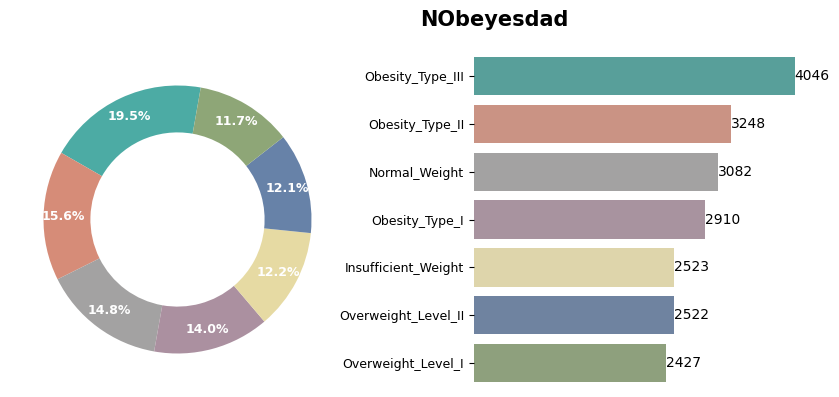

In [31]:
showplot("NObeyesdad")

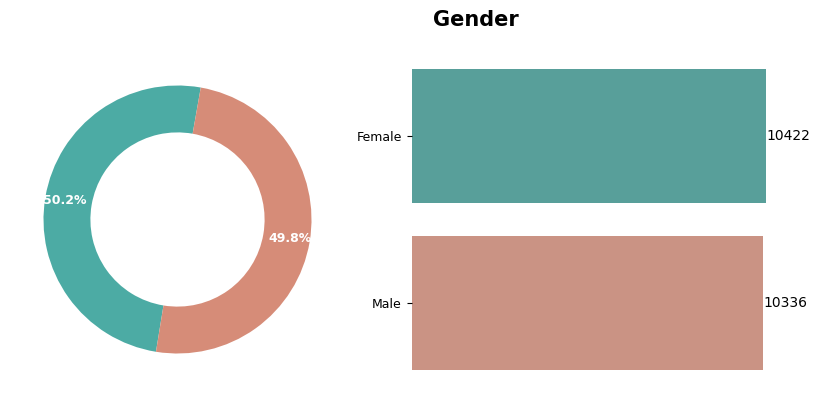

In [32]:
showplot('Gender')

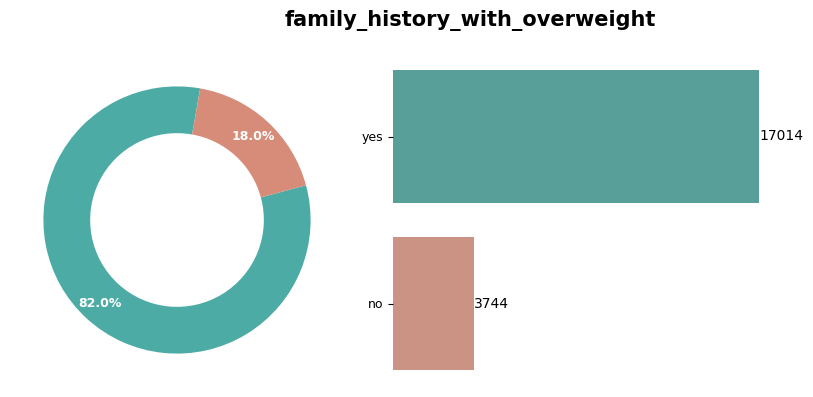

In [33]:
showplot("family_history_with_overweight")

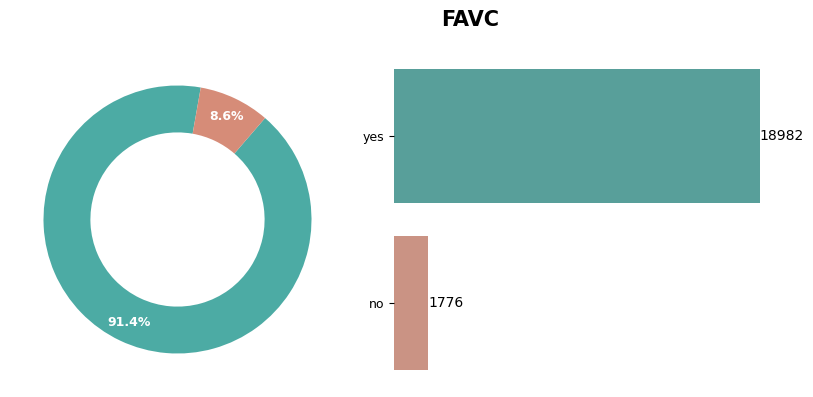

In [34]:
showplot("FAVC")

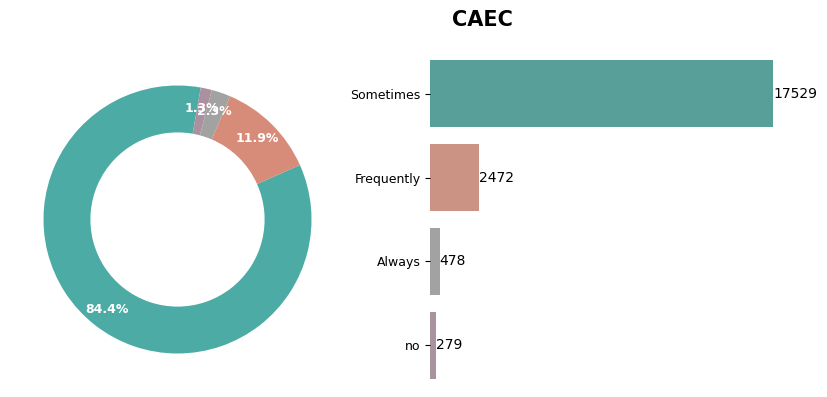

In [19]:
showplot("CAEC")

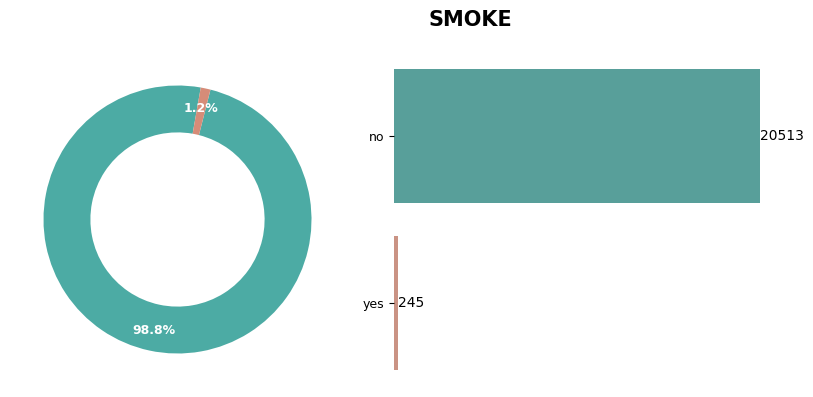

In [20]:
showplot("SMOKE")

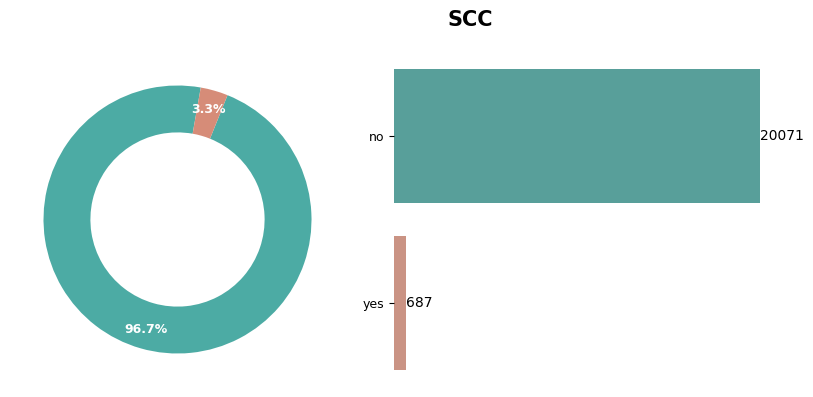

In [21]:
showplot("SCC")

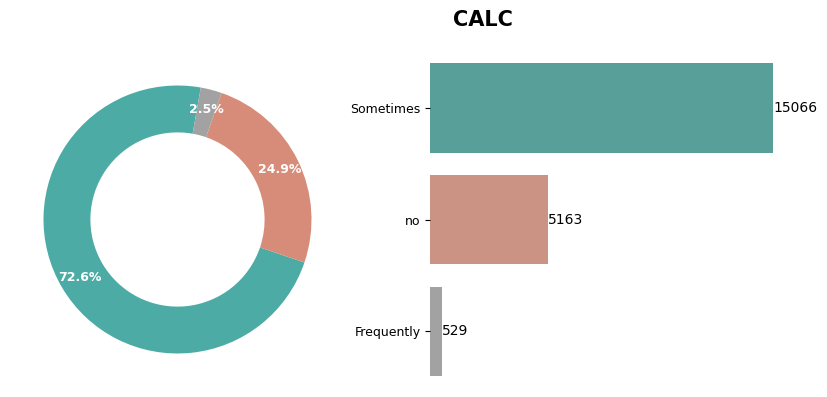

In [22]:
showplot("CALC")

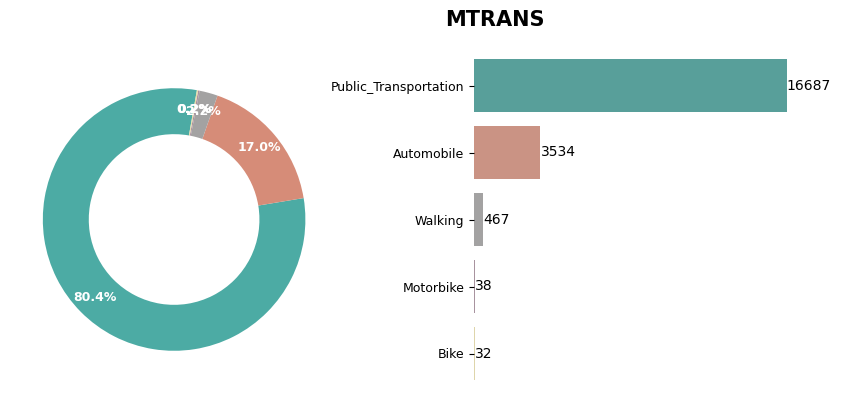

In [23]:
showplot("MTRANS")

In [35]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
def dist(train_dataset, original_dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(24, 10))
    plt.suptitle('Distribution for numerical features: Train vs Original Dataset', fontsize=16, fontweight='bold')
    axs = axs.flatten()
    
    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#05b0a3', label='Train')
        sns.kdeplot(original_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#d68c78', label='Original')
        axs[i].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}\n Original skewness: {original_dataset[col].skew():.2f}')
        axs[i].legend()
        
    plt.tight_layout()

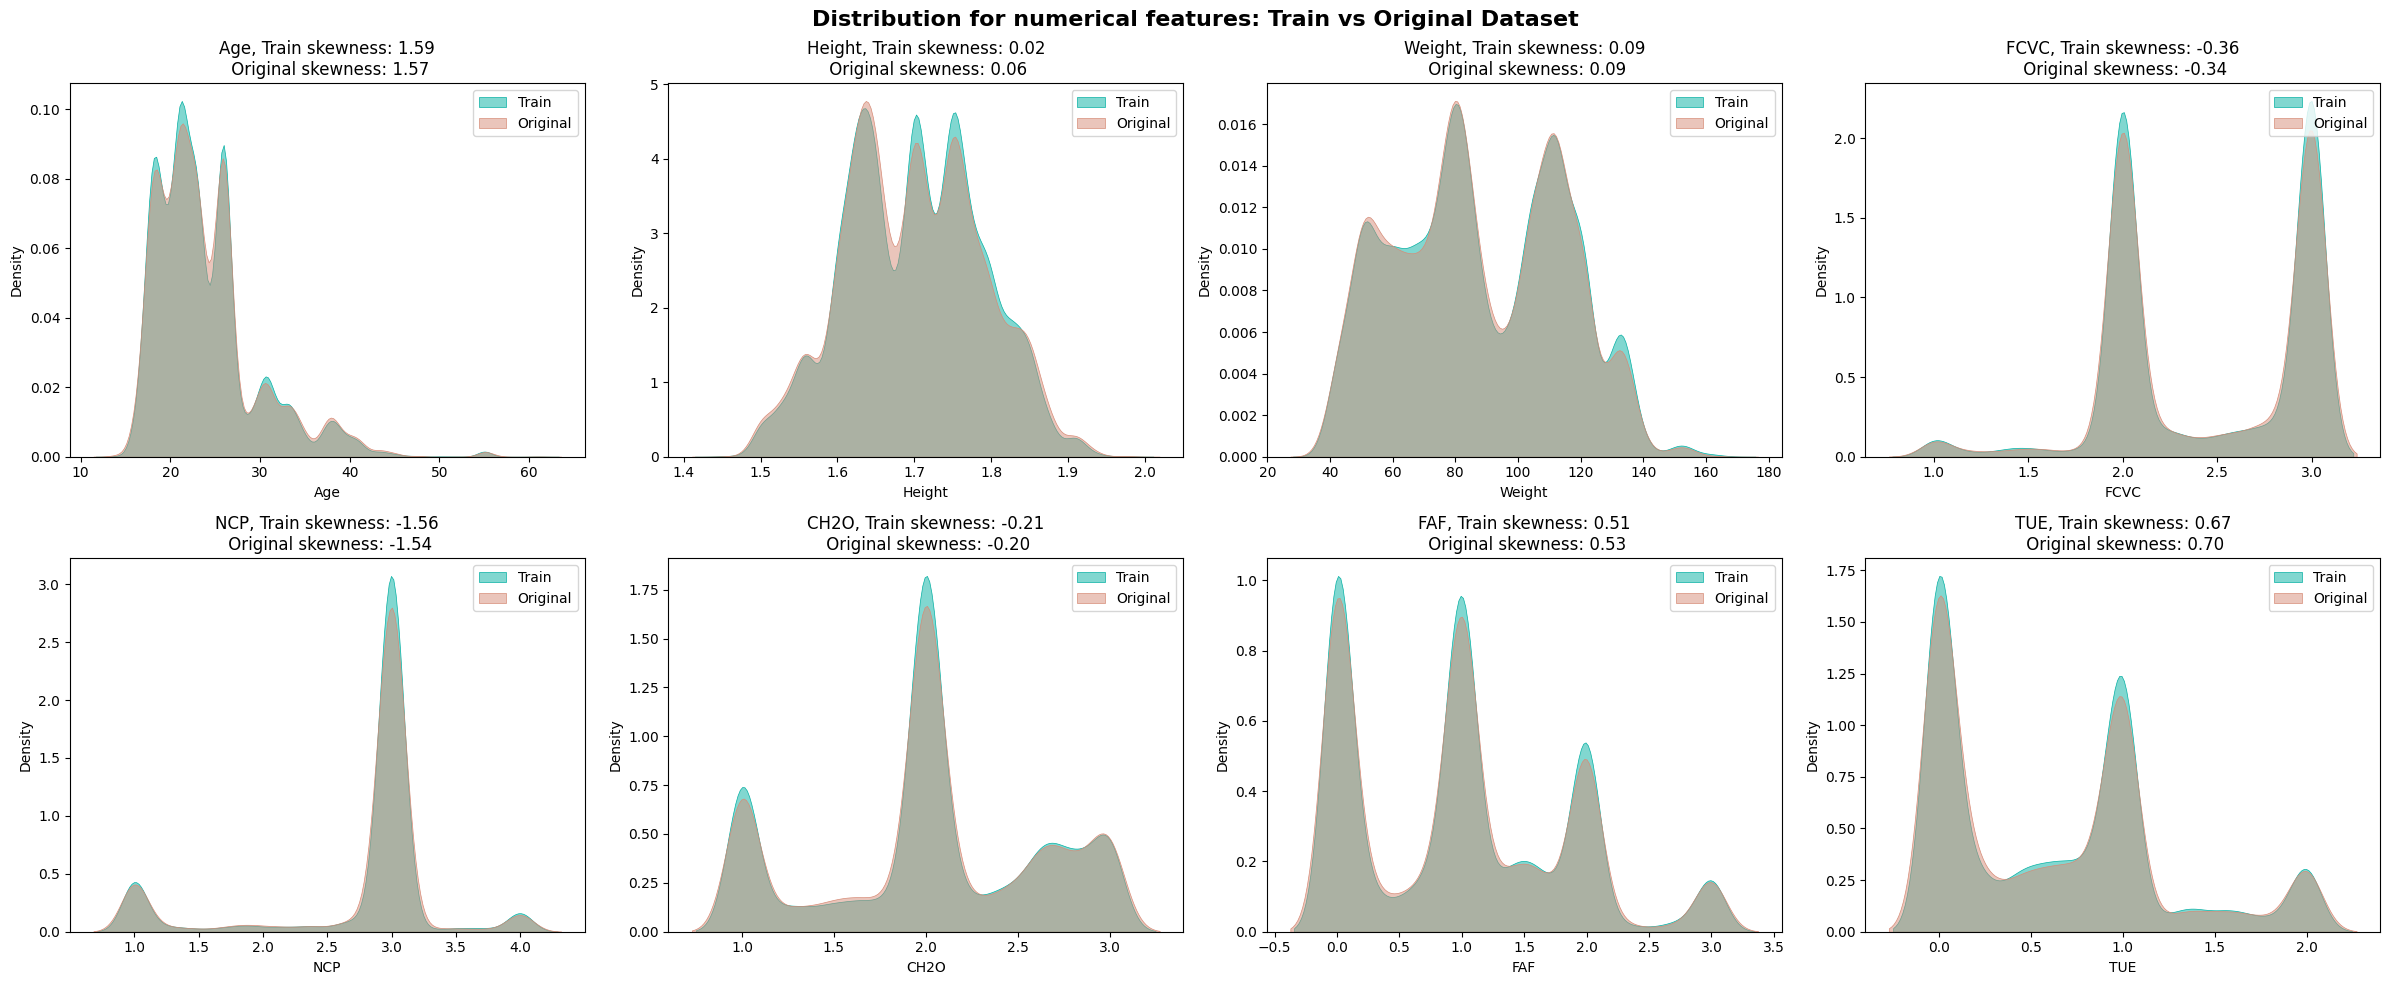

In [36]:
dist(train_dataset=train, original_dataset=test, columns_list=numeric_columns.columns, rows=2, cols=4)

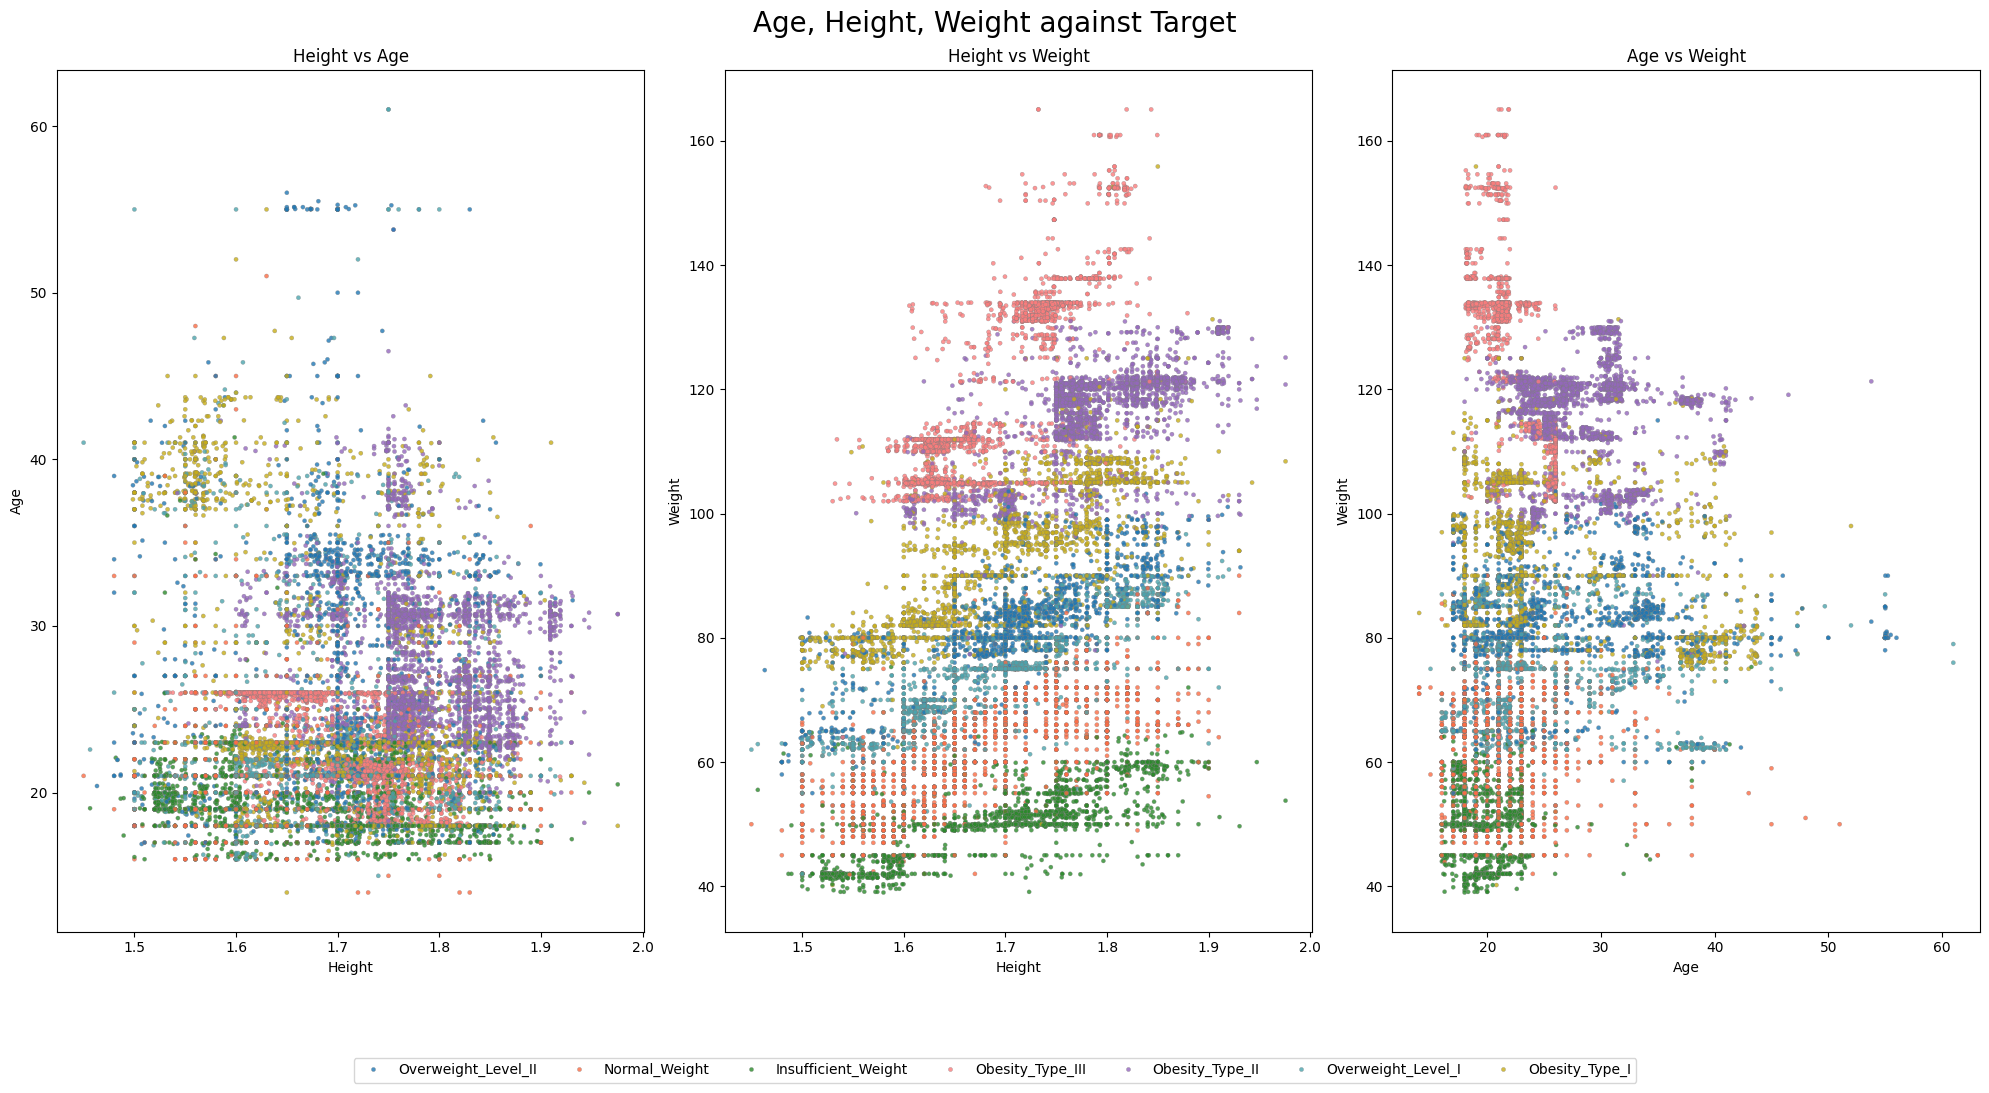

In [26]:
colors = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108']
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax1 = sns.scatterplot(x=train['Height'], y=train['Age'], hue="NObeyesdad",
                       data=train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[0])
axes[0].set_title('Height vs Age')
ax2 = sns.scatterplot(x=train['Height'], y=train['Weight'], hue="NObeyesdad",
                       data=train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[1])
axes[1].set_title('Height vs Weight')
ax3 = sns.scatterplot(x=train['Age'], y=train['Weight'], hue="NObeyesdad",
                       data=train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[2])
axes[2].set_title('Age vs Weight')
for ax in axes.flatten():
    ax.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(train['NObeyesdad'].unique()),
           title='')
fig.suptitle('Age, Height, Weight against Target', fontsize=20)
fig.subplots_adjust(bottom=0.5, top=0.9, hspace=0.5)
plt.tight_layout()
plt.show()

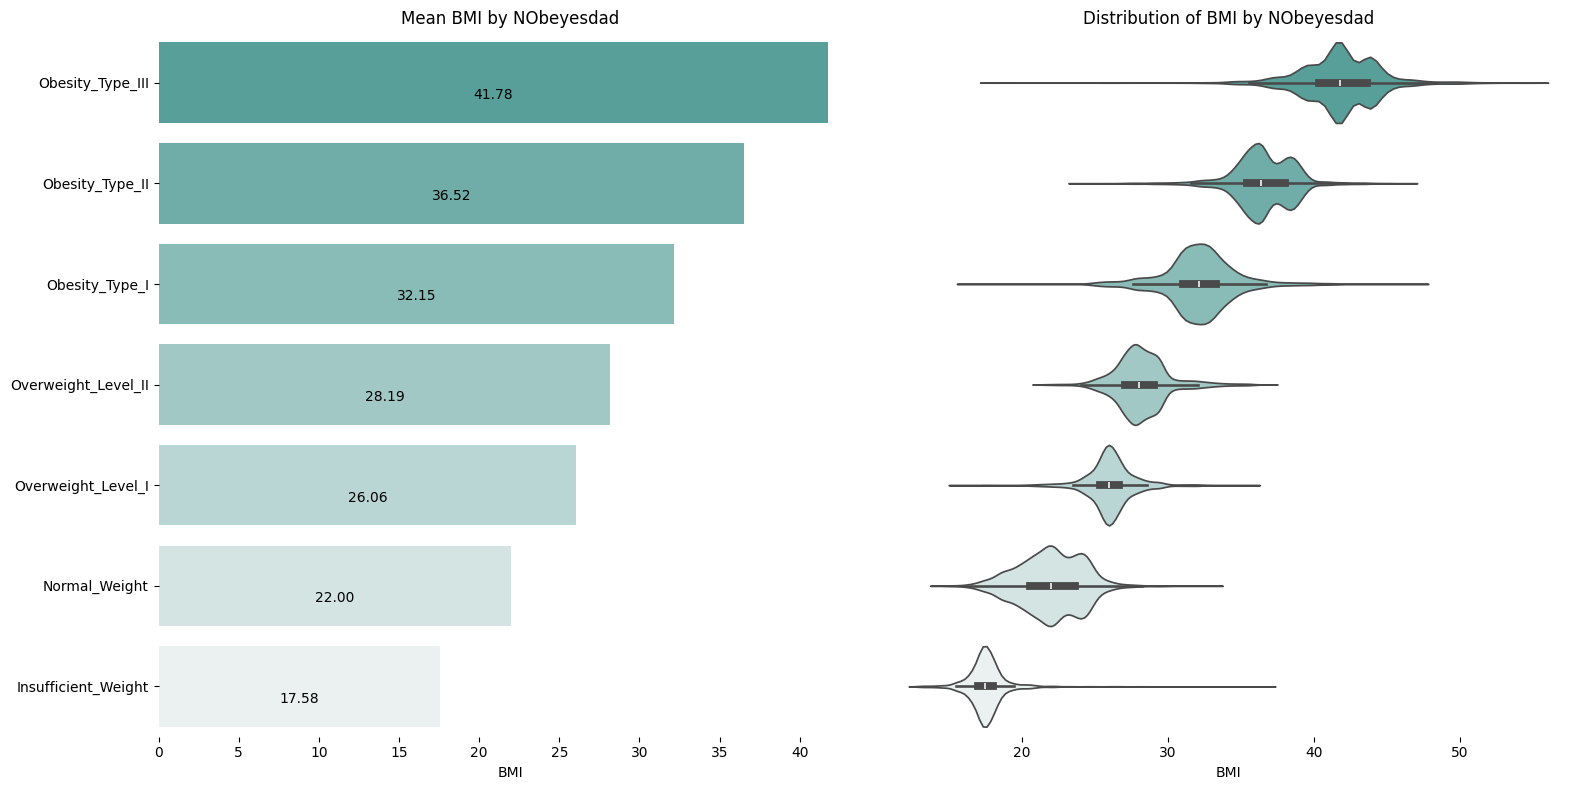

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
train['BMI']=  train['Weight'] / train['Height']**2
ax1 = axes[0]
df_sort = train.groupby('NObeyesdad')['BMI'].mean().sort_values(ascending=False).index
sns.barplot(x='BMI', y='NObeyesdad', data=train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean BMI by NObeyesdad')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='NObeyesdad', data=train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

In [38]:
train.groupby('NObeyesdad')['BMI'].describe().reset_index().style.background_gradient()

BMI가 그렇게 영향을 주진 않는거 같다.. -> bmi는 단순 키몸무게로 하는건데 근육돼지는 비만이 아니거든요

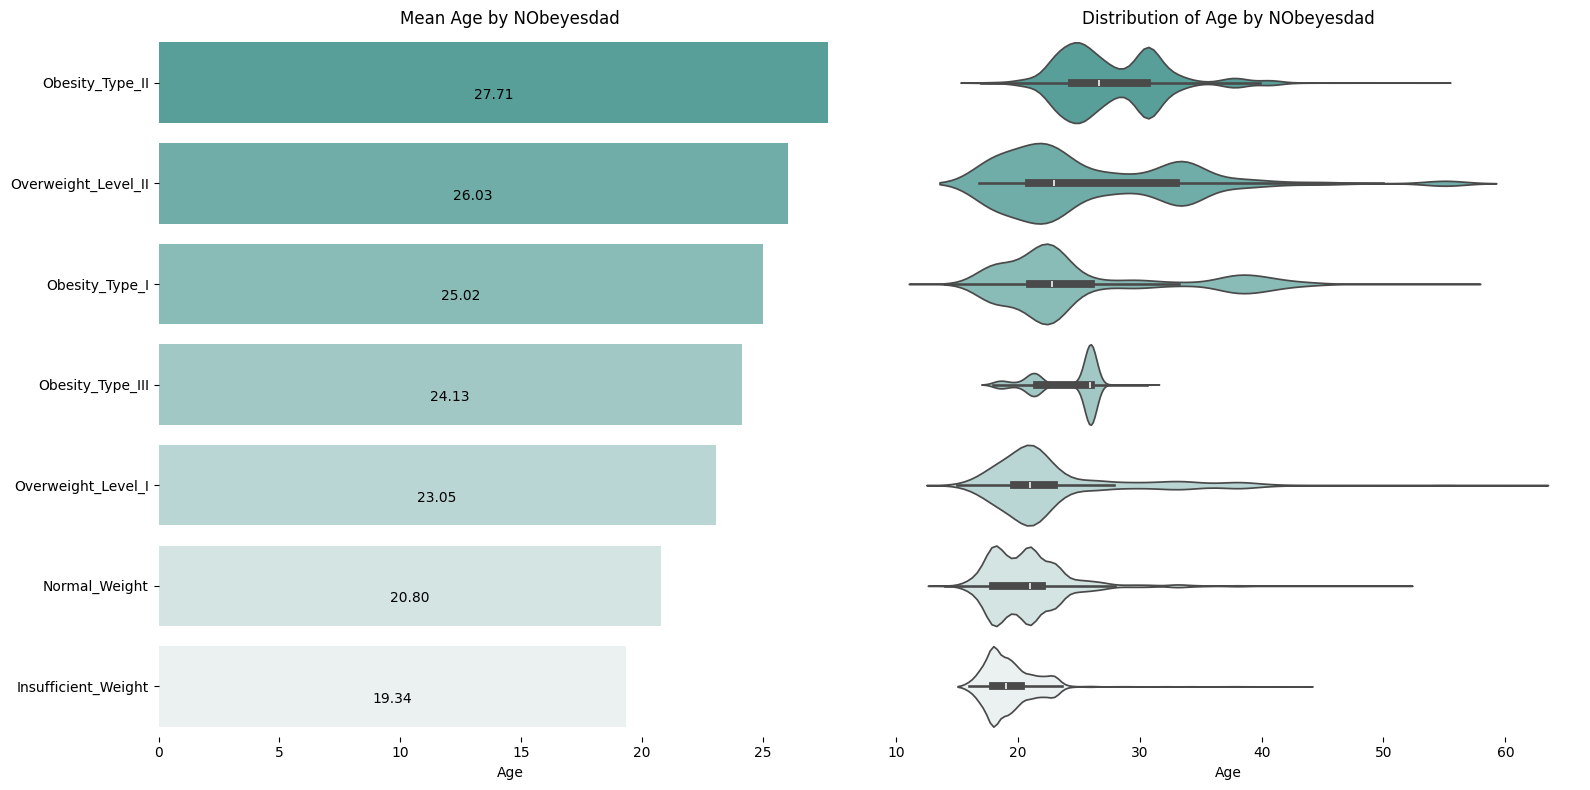

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax1 = axes[0]
df_sort = train.groupby('NObeyesdad')['Age'].mean().sort_values(ascending=False).index
sns.barplot(x='Age', y='NObeyesdad', data=train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean Age by NObeyesdad')
ax1.set_xlabel('Age')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='Age', y='NObeyesdad', data=train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of Age by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

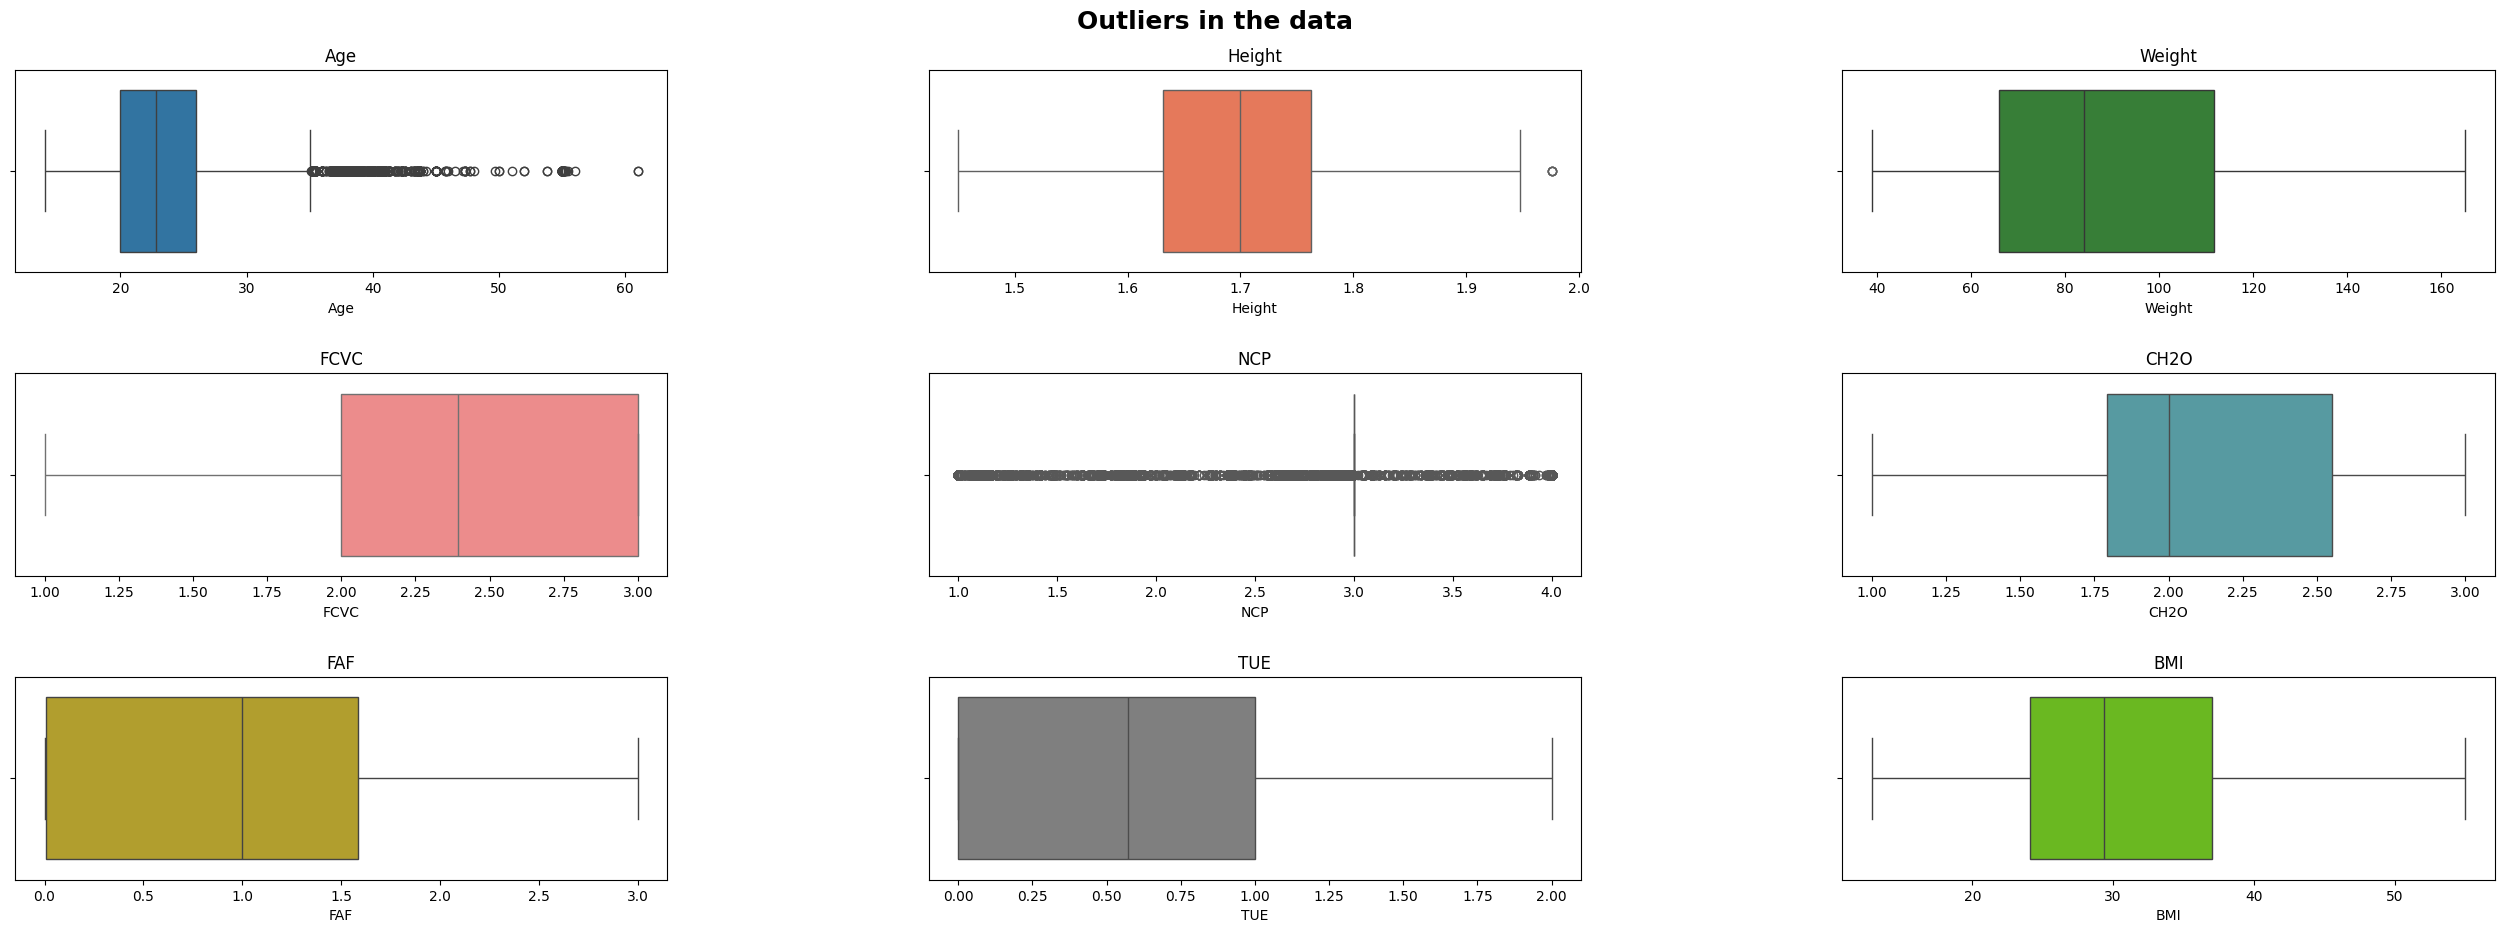

In [30]:
#Check for presence of outliers in each feature
numeric_columns = train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
fig = plt.figure(figsize=[32,10])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(3,3, i+1);
    ax = sns.boxplot(data = train, x=col ,  color= colors[i]);
    ax.set_title(f'{col}')
    ax.set_xlabel(f'{col}')
    ax.grid(False)
plt.show()

In [75]:
#전처리!
df_train = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

In [76]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(df_train)
categorical_vars.remove('NObeyesdad')

In [77]:
continuous_vars , categorical_vars

(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'],
 ['Gender',
  'family_history_with_overweight',
  'FAVC',
  'CAEC',
  'SMOKE',
  'SCC',
  'CALC',
  'MTRANS'])

In [78]:
train = df_train.copy()
test = df_test.drop(['id'], axis=1)

In [79]:
train = pd.get_dummies(train, columns=categorical_vars, drop_first=True)
test = pd.get_dummies(test, columns=categorical_vars, drop_first=True)

In [80]:
#Let's check the Shape of data
print(f'The encoded Train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The encoded Test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

The encoded Train dataset has 20758 rows and 24 columns
The encoded Test dataset has 13840 rows and 23 columns


In [81]:
X = train.drop(['NObeyesdad'], axis=1)
y = train['NObeyesdad']

In [82]:
X.shape

(20758, 23)

In [83]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [84]:
#모델짜기 , 로시트직 lgmb, catboost, xgboost, randomforest, decisiontree, logisticregression, knn, svc, adaboost, gradientboosting 
#되면XAI까지

In [85]:
train

id        Age    Height      Weight      FCVC       NCP      CH2O  \
0          0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1          1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2          2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3          3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4          4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   
...      ...        ...       ...         ...       ...       ...       ...   
20753  20753  25.137087  1.766626  114.187096  2.919584  3.000000  2.151809   
20754  20754  18.000000  1.710000   50.000000  3.000000  4.000000  1.000000   
20755  20755  20.101026  1.819557  105.580491  2.407817  3.000000  2.000000   
20756  20756  33.852953  1.700000   83.520113  2.671238  1.971472  2.144838   
20757  20757  26.680376  1.816547  118.134898  3.000000  3.000000  2.003563   

            FAF       TUE           NObeyesdad  ...  CAEC_Sometimes  CAEC_no  \
0      0.000000  0.976473  Overweight_Level_II  ...               1        0   
1      1.000000  1.000000        Normal_Weight  ...               0        0   
2      0.866045  1.673584  Insufficient_Weight  ...               1        0   
3      1.467863  0.780199     Obesity_Type_III  ...               1        0   
4      1.967973  0.931721  Overweight_Level_II  ...               1        0   
...         ...       ...                  ...  ...             ...      ...   
20753  1.330519  0.196680      Obesity_Type_II  ...               1        0   
20754  2.000000  1.000000  Insufficient_Weight  ...               0        0   
20755  1.158040  1.198439      Obesity_Type_II  ...               1        0   
20756  0.000000  0.973834  Overweight_Level_II  ...               1        0   
20757  0.684487  0.713823      Obesity_Type_II  ...               1        0   

       SMOKE_yes  SCC_yes  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0              0        0               1        0            0   
1              0        0               0        1            0   
2              0        0               0        1            0   
3              0        0               1        0            0   
4              0        0               1        0            0   
...          ...      ...             ...      ...          ...   
20753          0        0               1        0            0   
20754          0        0               1        0            0   
20755          0        0               0        1            0   
20756          0        0               0        1            0   
20757          0        0               1        0            0   

       MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                     0                             1               0  
1                     0                             0               0  
2                     0                             1               0  
3                     0                             1               0  
4                     0                             1               0  
...                 ...                           ...             ...  
20753                 0                             1               0  
20754                 0                             1               0  
20755                 0                             1               0  
20756                 0                             0               0  
20757                 0                             1               0  

[20758 rows x 24 columns]

In [86]:
y #너무 범주가 많아요 overweight를 1로 두고 나머지는 0으로 두겠습니다.

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

In [87]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
model = LogisticRegression(multi_class='auto', max_iter=1000, random_state=42)

In [90]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [91]:
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.43665703275529866


In [92]:
cm = confusion_matrix(y_test, y_pred)

# 분할표 출력
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[249 169  10   1   1  85   9]
 [108 233  78  32  16 129  30]
 [ 35  27 106 184 150  22  19]
 [  1   1  54 418 158   0  25]
 [  0   0   0 123 681   0   0]
 [ 49 133  90  90  57  47  18]
 [ 55  77 106 110  67  20  79]]


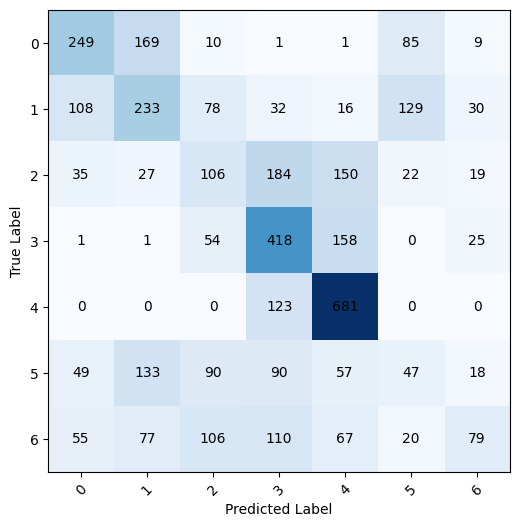

In [93]:
# Confusion matrix
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()

In [94]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [95]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [96]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
y_pred = model.predict(X_test)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.888728323699422


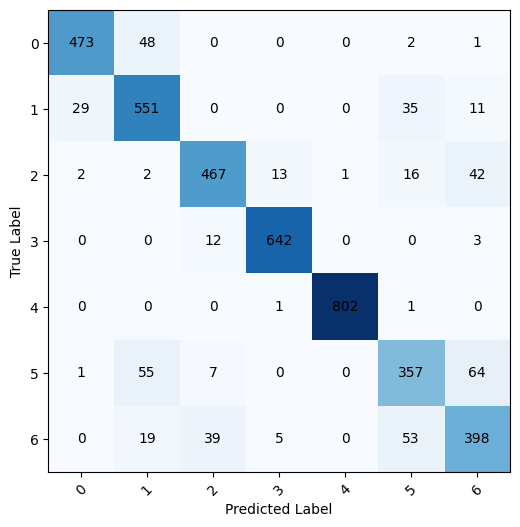

In [99]:
# Confusion matrix
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()

In [100]:
importances = model.feature_importances_

In [101]:
#random forest

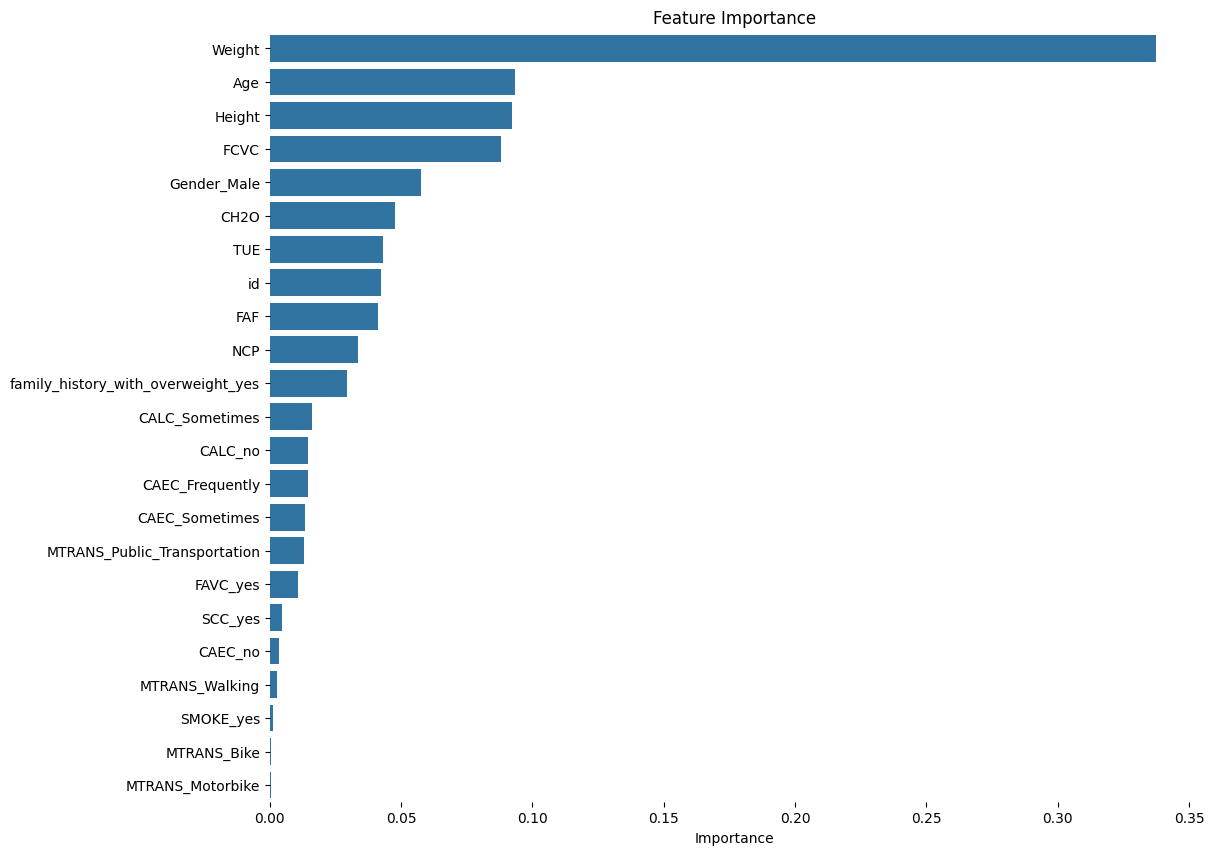

In [102]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [103]:
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=42)


In [104]:
lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2304
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 23
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625


LGBMClassifier(random_state=42)

In [105]:
y_pred = lgbm_classifier.predict(X_test)

In [106]:
y_pred = lgbm_classifier.predict(X_test)
accuracy_score(y_test, y_pred) 

0.9010115606936416

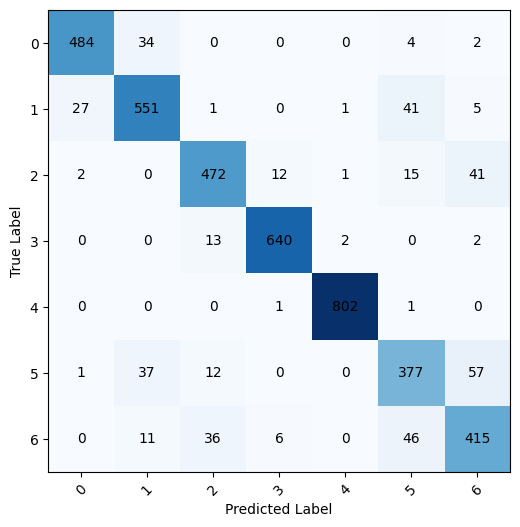

In [107]:
# Confusion matrix
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()

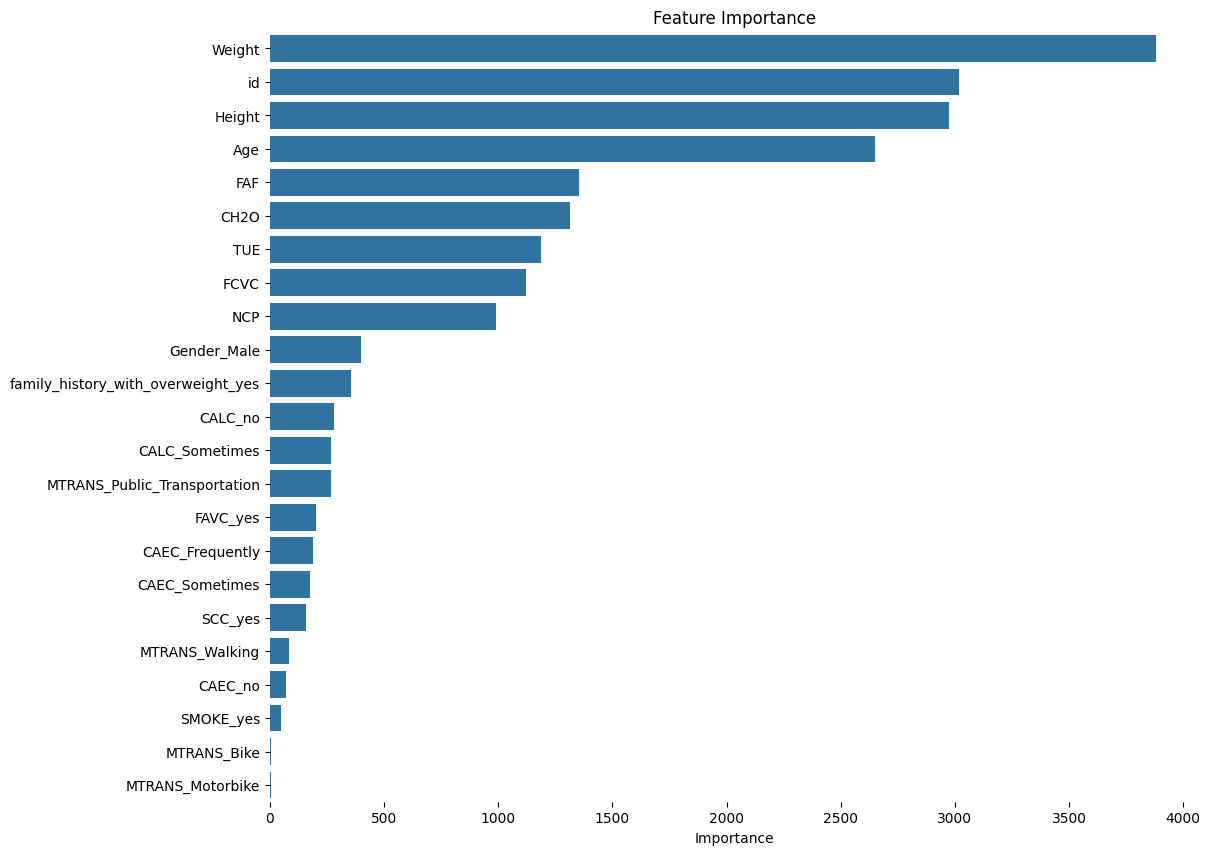

In [108]:
feature_importance = lgbm_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [109]:
#xgboost
from sklearn.preprocessing import LabelEncoder

In [110]:
label_encoder = LabelEncoder()
y_tr = label_encoder.fit_transform(y_train)
y_te = label_encoder.transform(y_test)

In [111]:
model = XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)

In [112]:
model.fit(X_train, y_tr)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [113]:
y_pred = model.predict(X_test)
accuracy_score(y_te, y_pred) 

0.9005298651252408

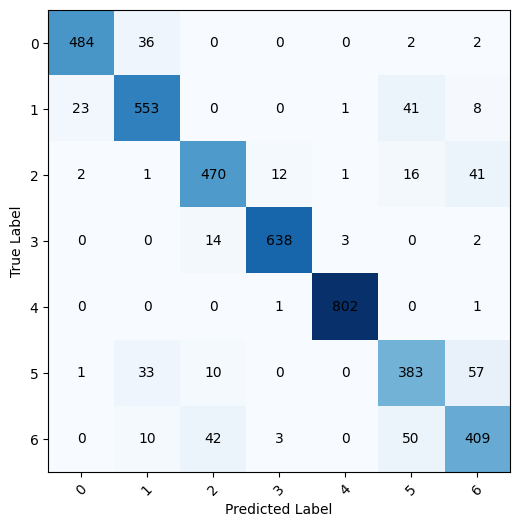

In [114]:
# Confusion matrix
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_te, y_pred)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()

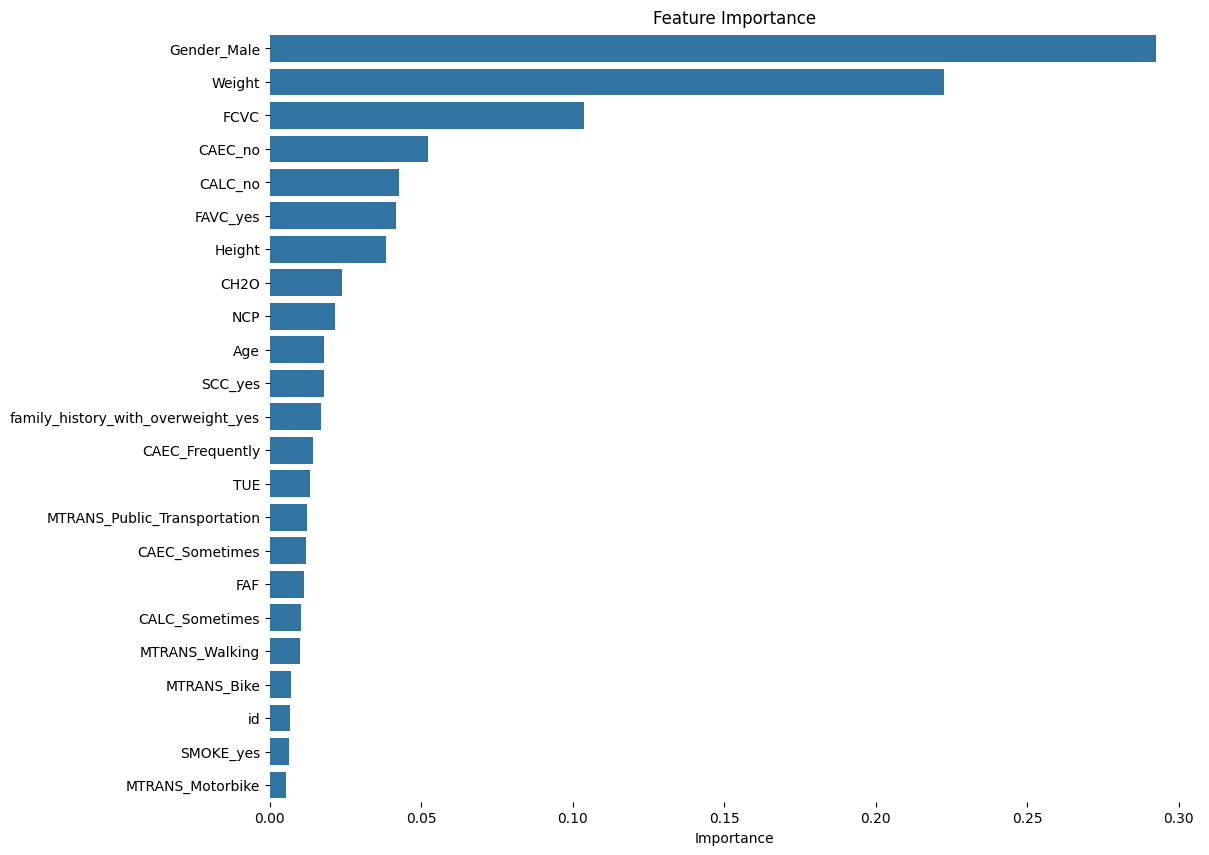

In [115]:
# feature importances
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [116]:
feature_importance_df

Feature  Importance
9                          Gender_Male    0.292408
3                               Weight    0.222442
4                                 FCVC    0.103665
14                             CAEC_no    0.052066
18                             CALC_no    0.042619
11                            FAVC_yes    0.041721
2                               Height    0.038296
6                                 CH2O    0.023900
5                                  NCP    0.021348
1                                  Age    0.017933
16                             SCC_yes    0.017920
10  family_history_with_overweight_yes    0.016984
12                     CAEC_Frequently    0.014392
8                                  TUE    0.013091
21        MTRANS_Public_Transportation    0.012229
13                      CAEC_Sometimes    0.012012
7                                  FAF    0.011323
17                      CALC_Sometimes    0.010327
22                      MTRANS_Walking    0.009830
19                         MTRANS_Bike    0.007028
0                                   id    0.006808
15                           SMOKE_yes    0.006479
20                    MTRANS_Motorbike    0.005179

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2304
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 23
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625


100%|===================| 29044/29064 [08:10<00:00]        

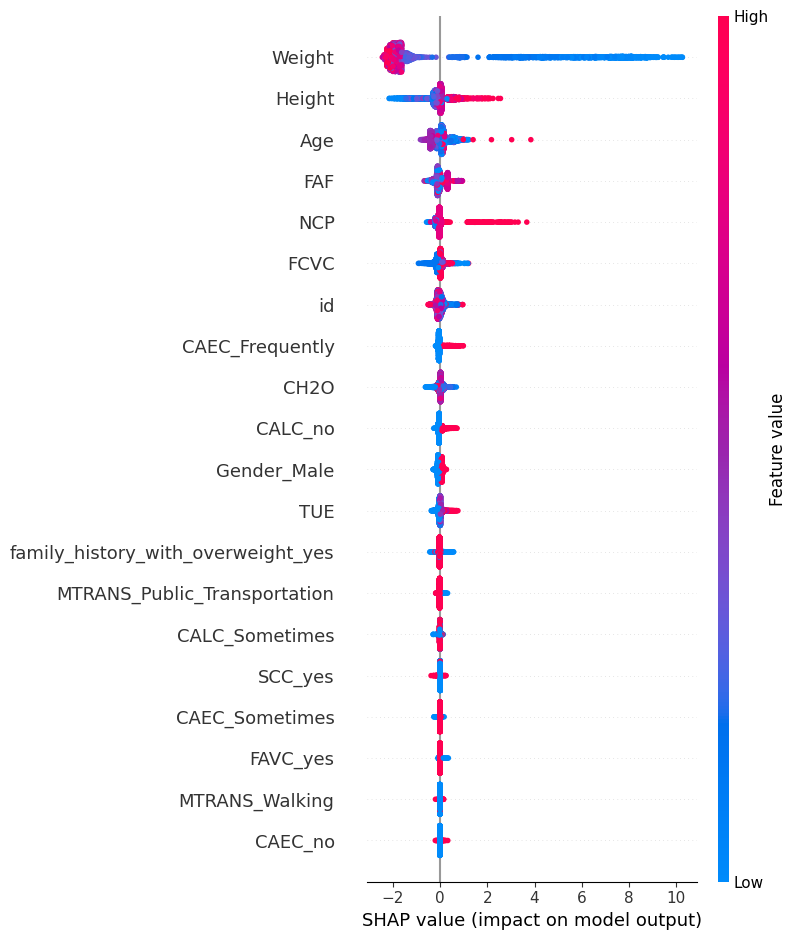

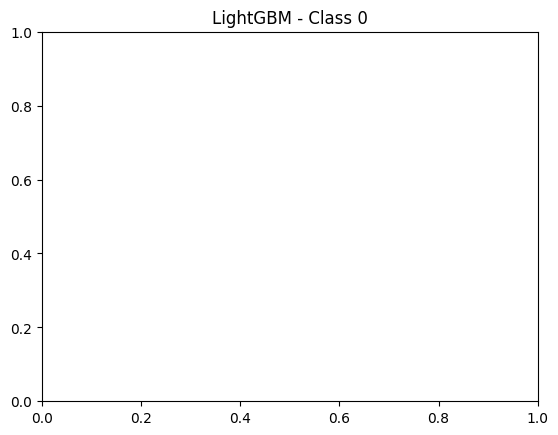

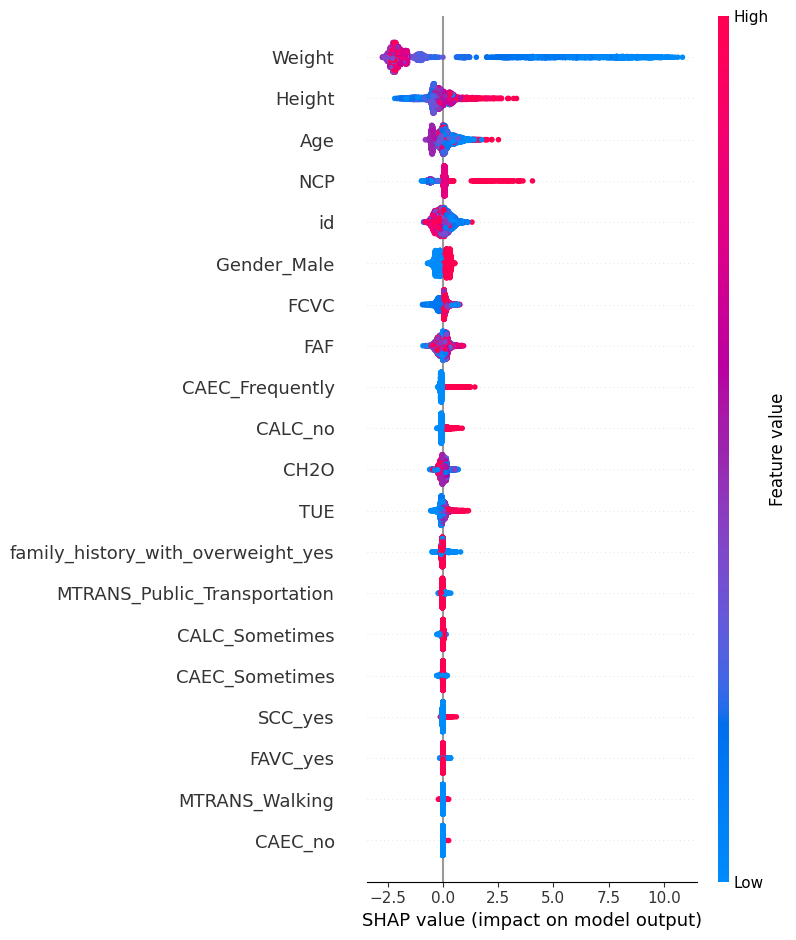

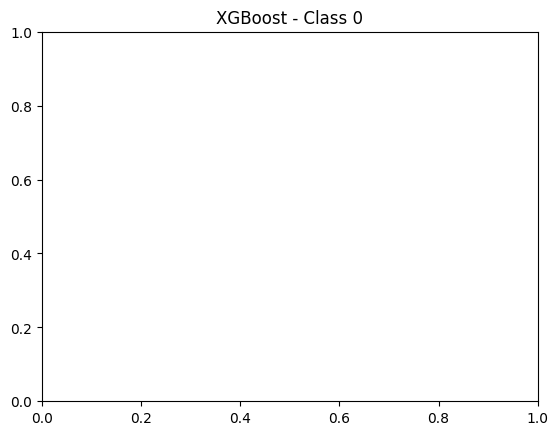

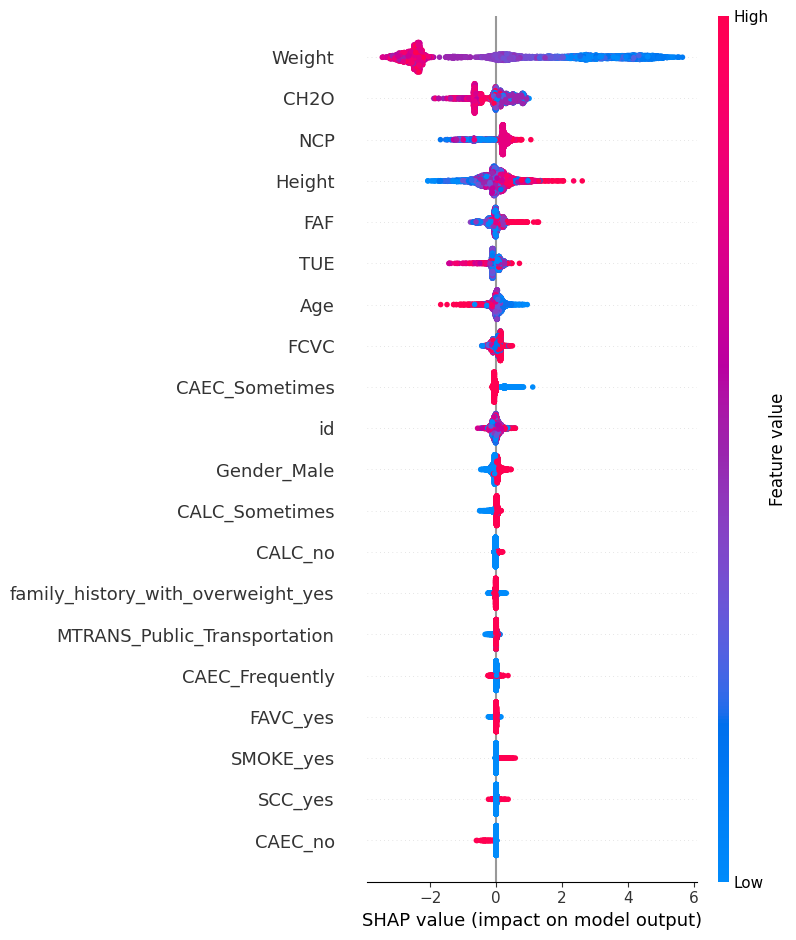

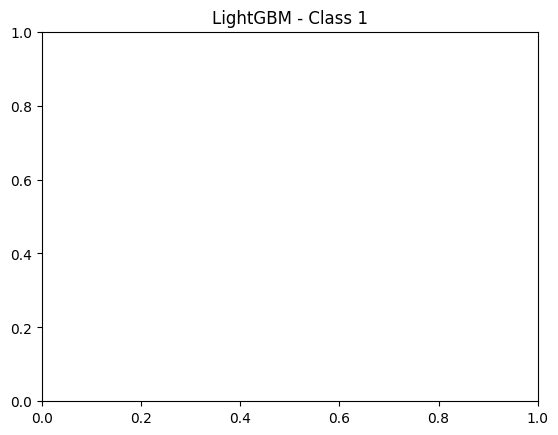

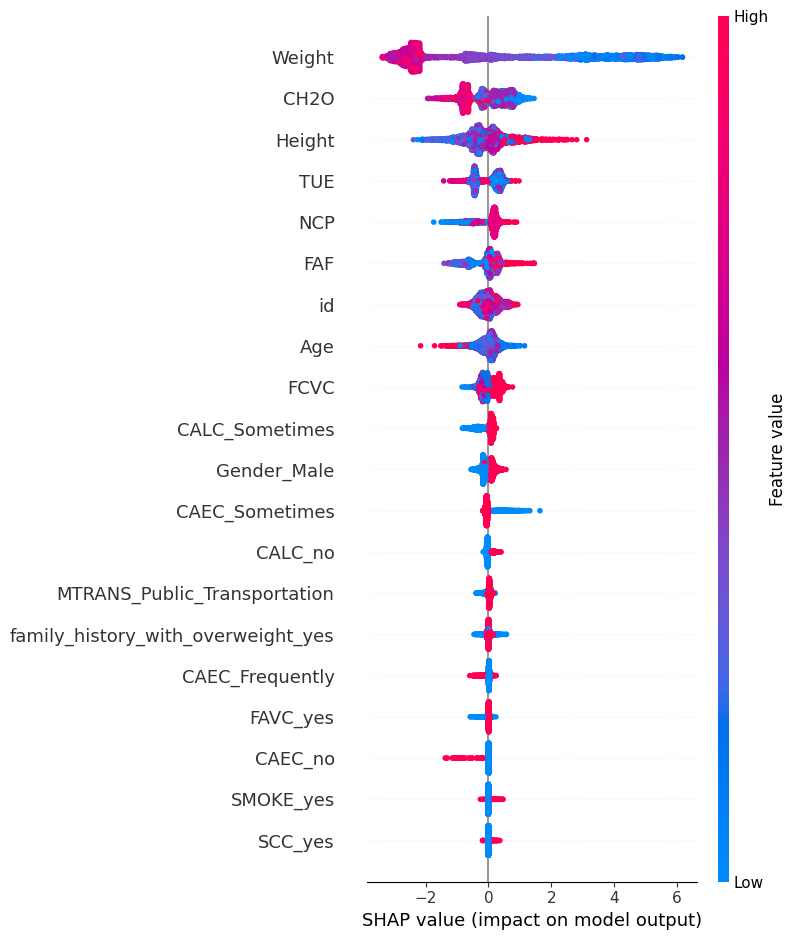

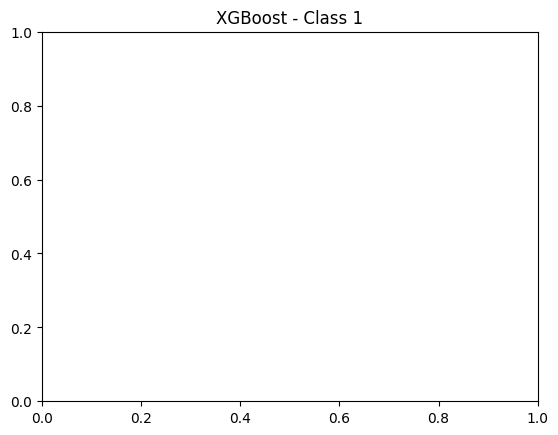

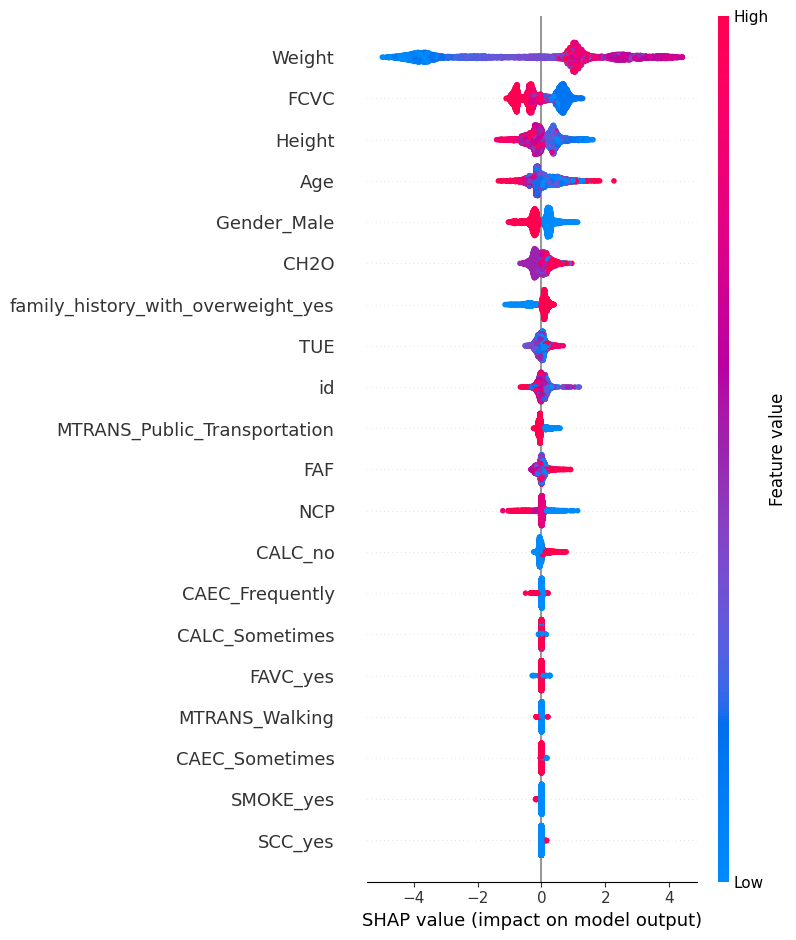

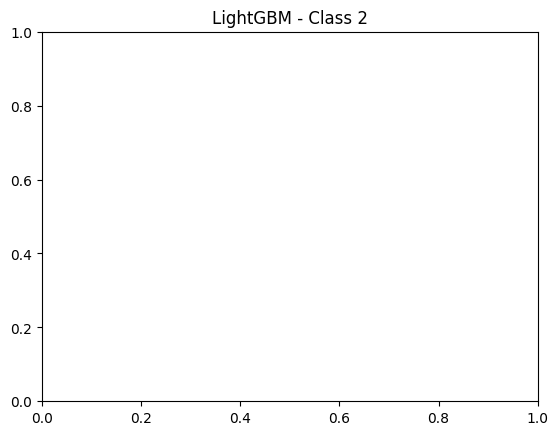

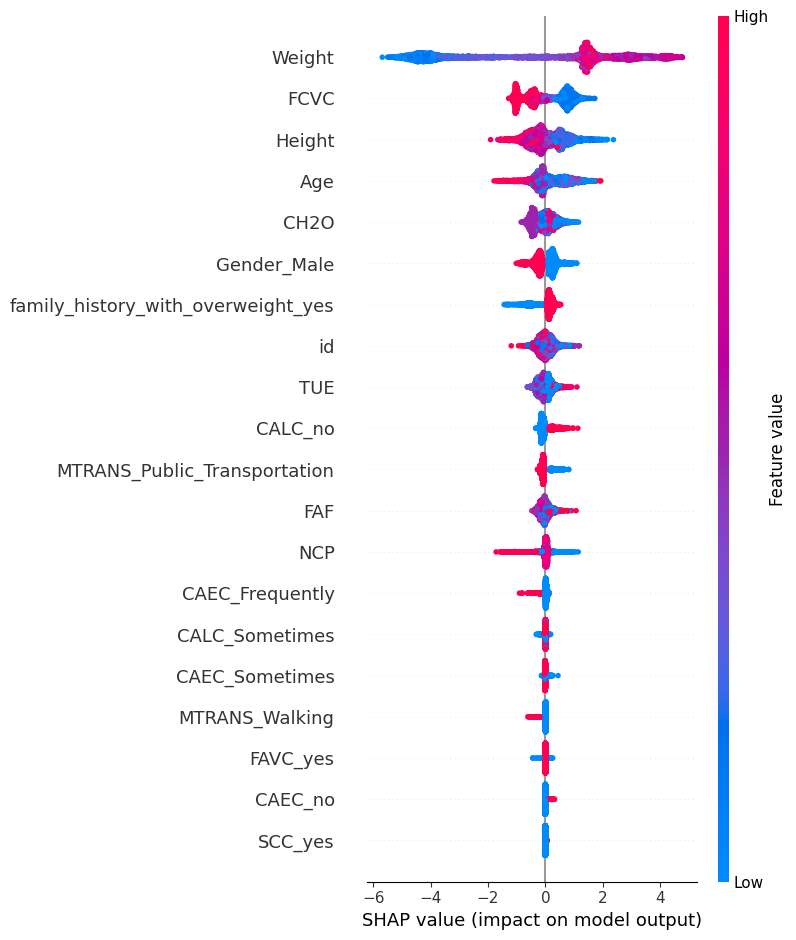

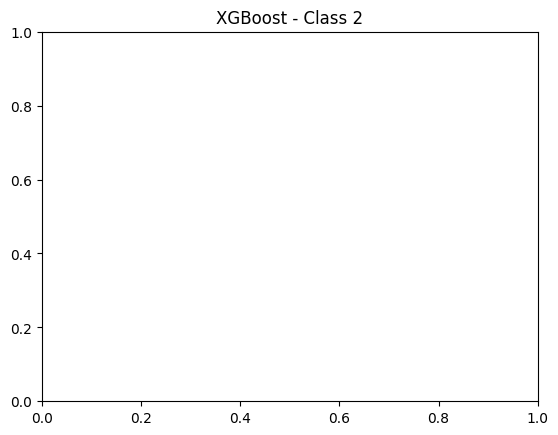

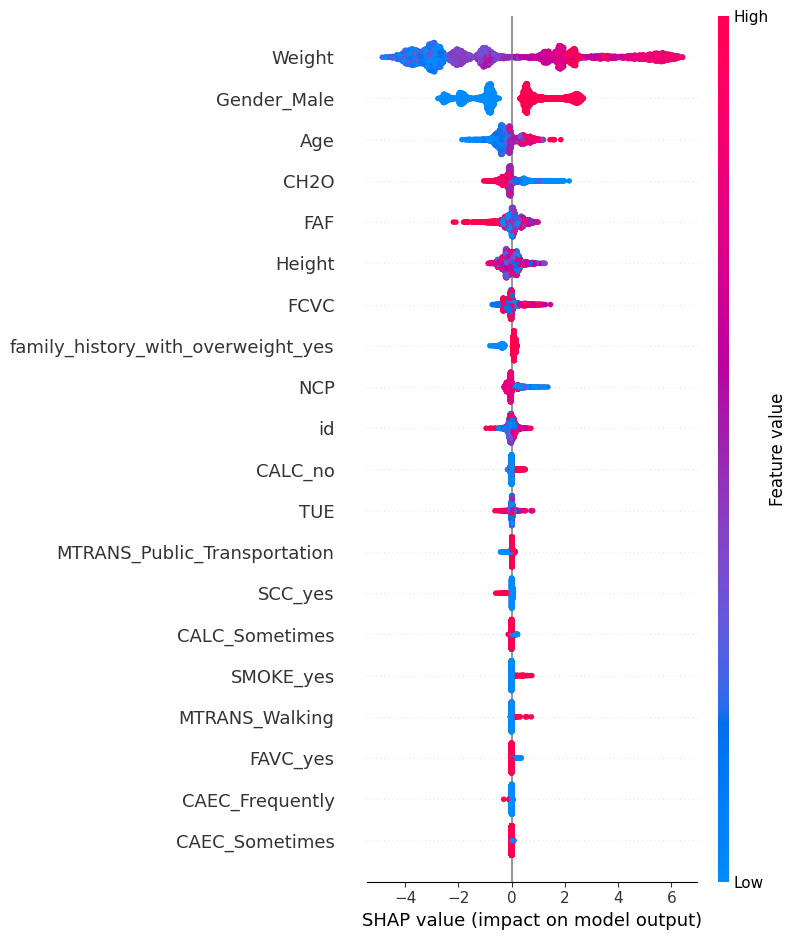

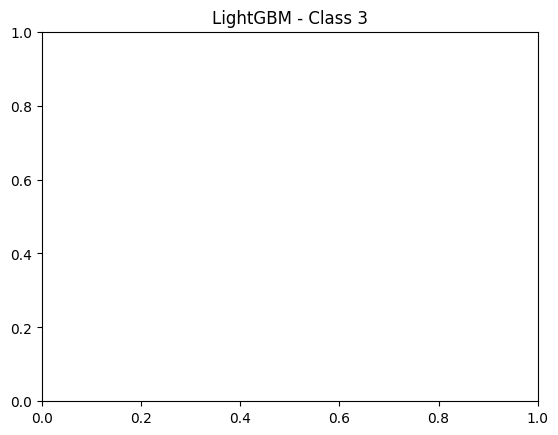

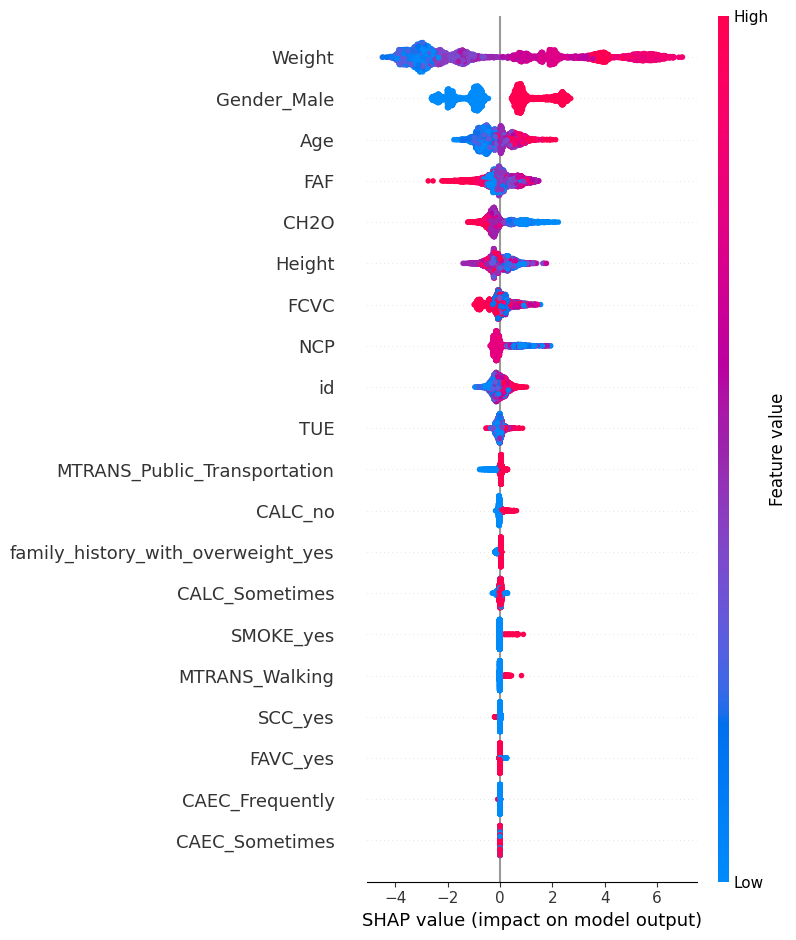

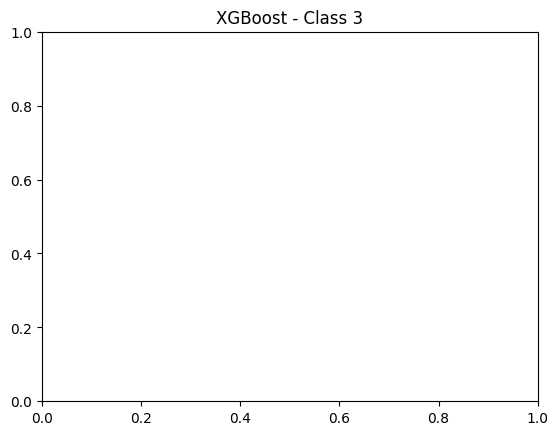

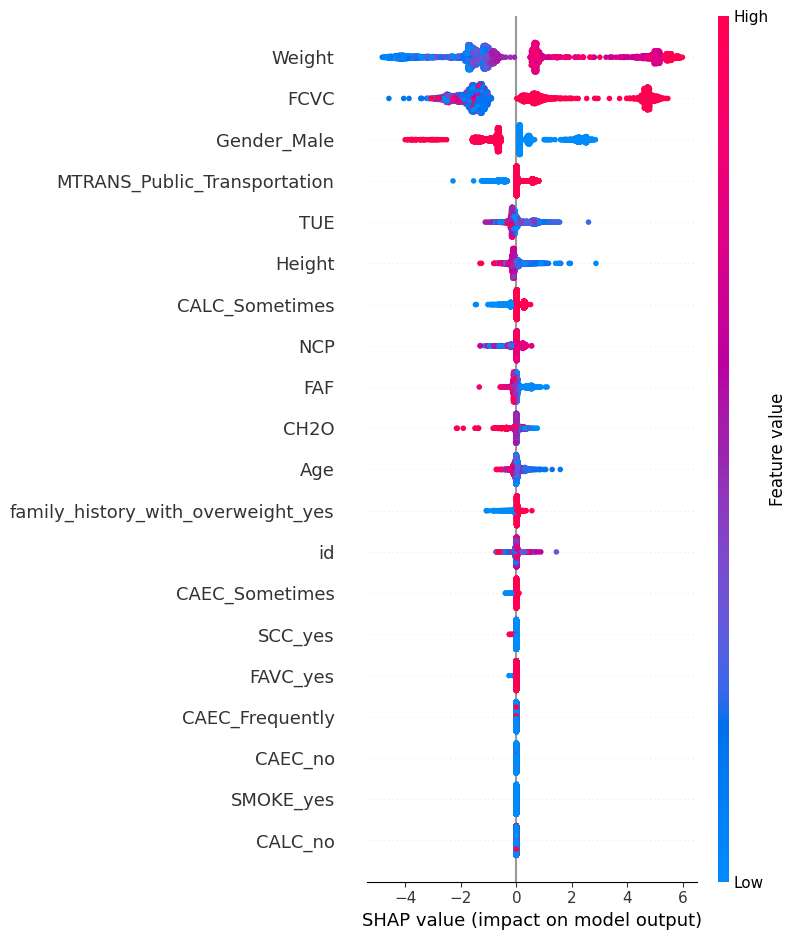

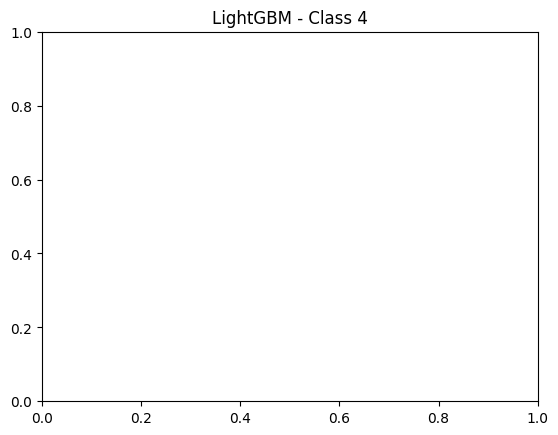

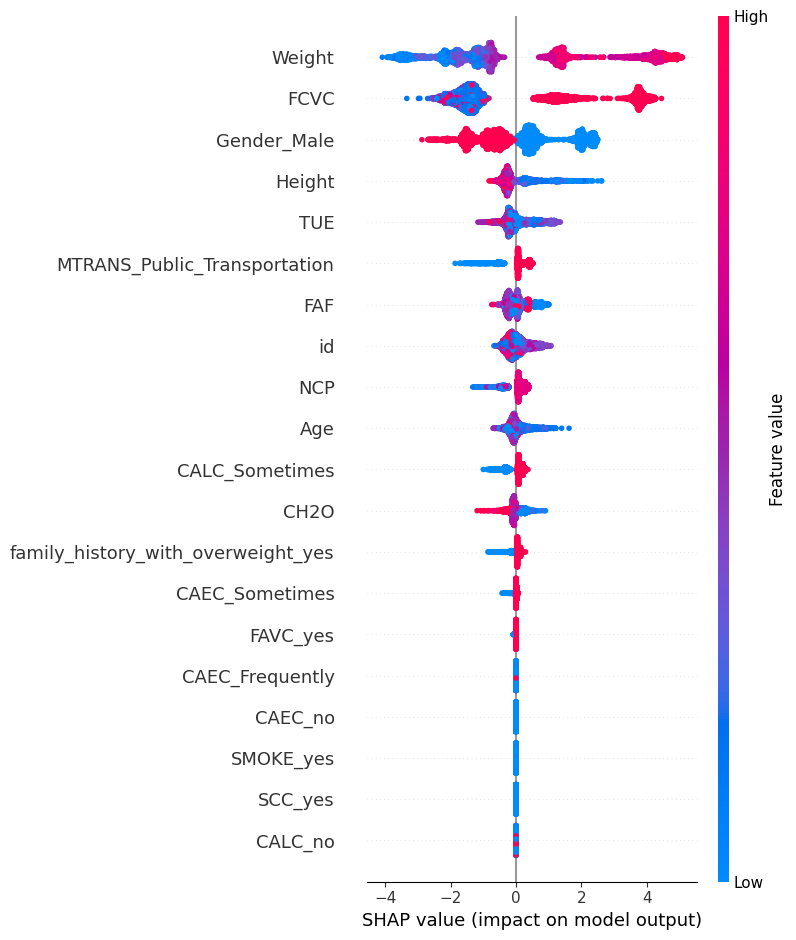

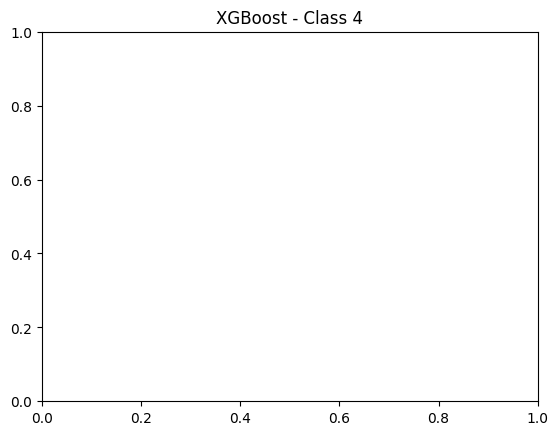

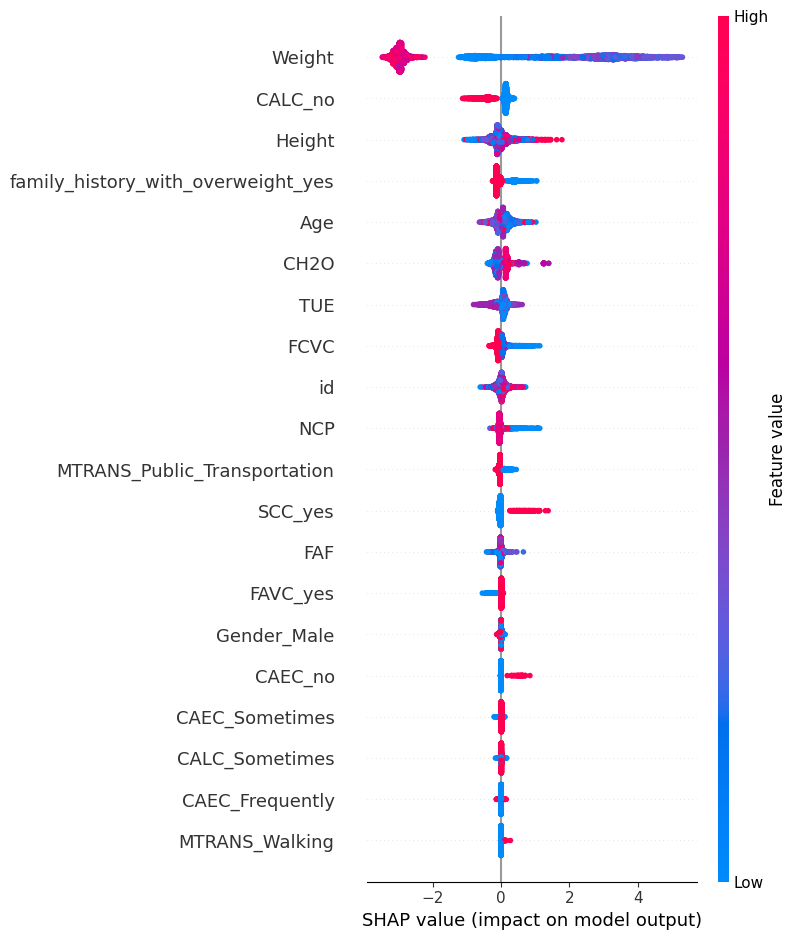

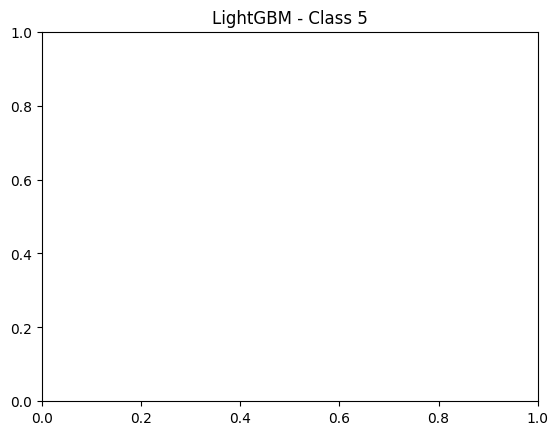

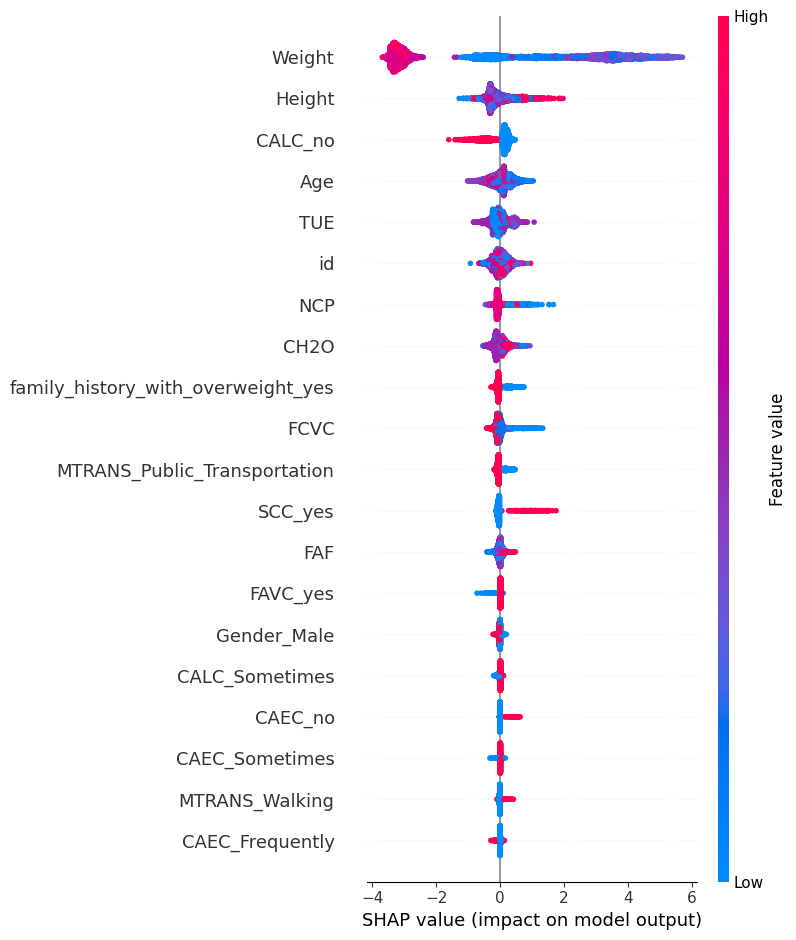

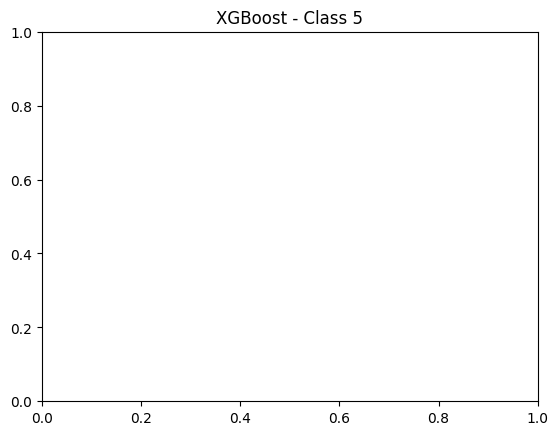

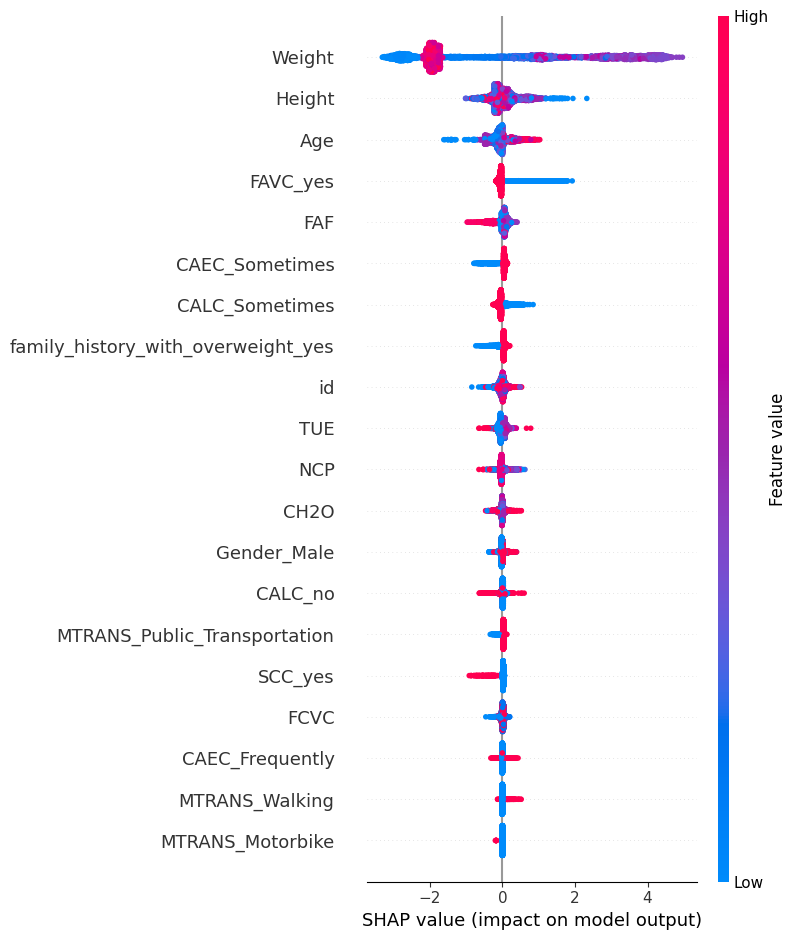

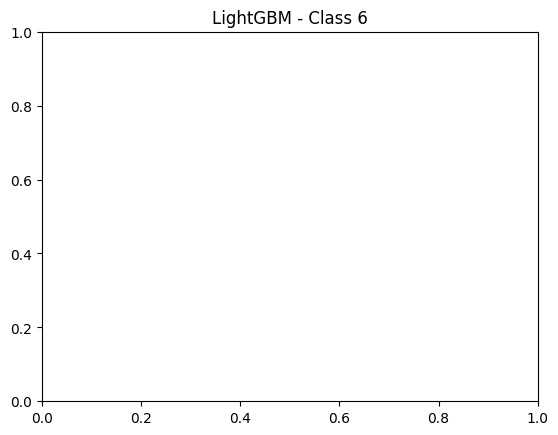

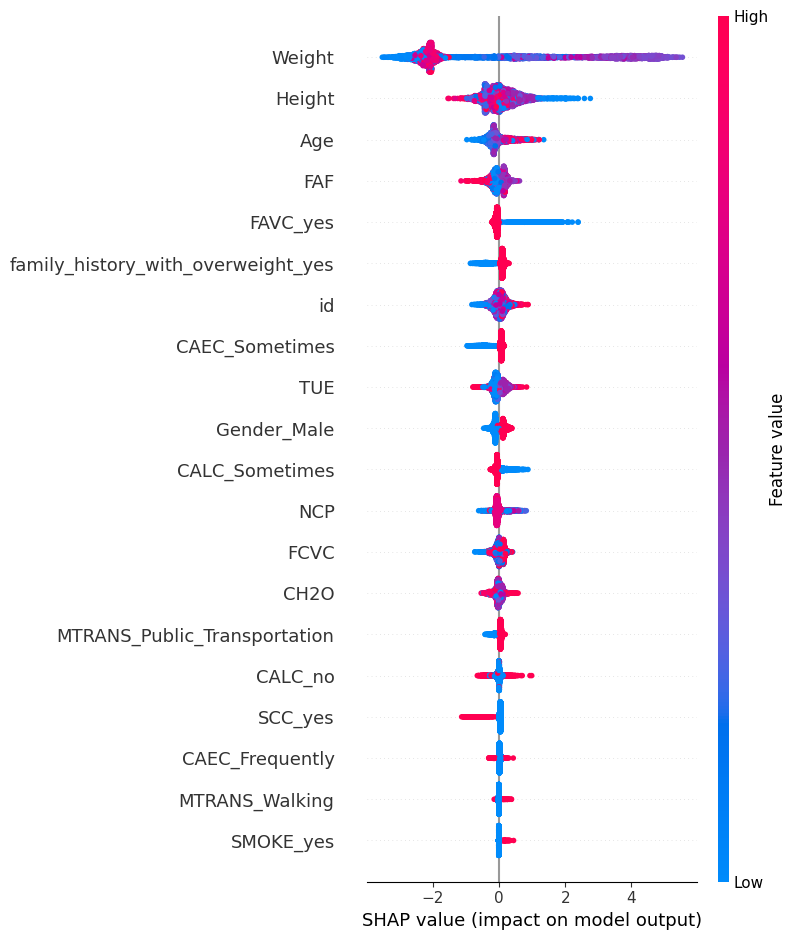

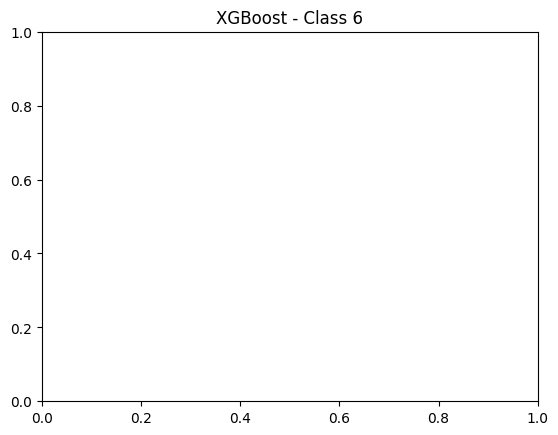

In [118]:

# LightGBM 모델 초기화 및 훈련
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# XGBoost 모델 초기화 및 훈련
xgb_model = XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train, y_tr)


explainer_lgb = shap.Explainer(lgb_model, X_train)
shap_values_lgb = explainer_lgb.shap_values(X_test)

explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# 각 클래스에 대한 SHAP summary plot 시각화
for class_index in range(7):
    shap.summary_plot(shap_values_lgb[class_index], X_test, class_names=["Class " + str(i) for i in range(7)])
    plt.title("LightGBM - Class " + str(class_index))
    plt.show()

    shap.summary_plot(shap_values_xgb[class_index], X_test, class_names=["Class " + str(i) for i in range(7)])
    plt.title("XGBoost - Class " + str(class_index))
    plt.show()